In [1]:
#importing needed liberary
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from tabulate import tabulate
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# Loading dataset
df = pd.read_csv("household_data_60min_singleindex.csv")

# Cleaning, modern CSS styling with horizontal scroll
styles = """
<style>
    .dataframe-container {
        overflow-x: auto;
        padding: 10px 0;
    }
    table {
        border-collapse: collapse;
        width: max-content;
        min-width: 100%;
        font-family: 'Arial', sans-serif;
        font-size: 16px;
        border-radius: 8px;
        overflow: hidden;
        box-shadow: 0 4px 20px rgba(0,0,0,0.05);
        margin-top: 20px;
        table-layout: auto;
        word-wrap: break-word;
    }
    th, td {
        border: 1px solid #ddd;
        text-align: left;
        padding: 14px 20px;
        line-height: 1.5;
        vertical-align: middle;
    }
    th {
        background-color: #4CAF50;
        color: white;
        font-size: 16px;
        font-weight: bold;
    }
    tr:nth-child(even) {
        background-color: #f9f9f9;
    }
    tr:hover {
        background-color: #f1faff;
    }
</style>
"""

# Converting DataFrame to HTML
html_table = df.head(5).to_html(index=False, escape=False)

# Wrapping the table in a div with horizontal scrolling
html_output = f"""
<div class="dataframe-container">
    {html_table}
</div>
"""

# Displaying styled, scrollable table
display(HTML(styles + html_output))

utc_timestamp,cet_cest_timestamp,DE_KN_industrial1_grid_import,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_grid_import,DE_KN_industrial2_pv,DE_KN_industrial2_storage_charge,DE_KN_industrial2_storage_decharge,DE_KN_industrial3_area_offices,DE_KN_industrial3_area_room_1,DE_KN_industrial3_area_room_2,DE_KN_industrial3_area_room_3,DE_KN_industrial3_area_room_4,DE_KN_industrial3_compressor,DE_KN_industrial3_cooling_aggregate,DE_KN_industrial3_cooling_pumps,DE_KN_industrial3_dishwasher,DE_KN_industrial3_ev,DE_KN_industrial3_grid_import,DE_KN_industrial3_machine_1,DE_KN_industrial3_machine_2,DE_KN_industrial3_machine_3,DE_KN_industrial3_machine_4,DE_KN_industrial3_machine_5,DE_KN_industrial3_pv_facade,DE_KN_industrial3_pv_roof,DE_KN_industrial3_refrigerator,DE_KN_industrial3_ventilation,DE_KN_public1_grid_import,DE_KN_public2_grid_import,DE_KN_residential1_dishwasher,DE_KN_residential1_freezer,DE_KN_residential1_grid_import,DE_KN_residential1_heat_pump,DE_KN_residential1_pv,DE_KN_residential1_washing_machine,DE_KN_residential2_circulation_pump,DE_KN_residential2_dishwasher,DE_KN_residential2_freezer,DE_KN_residential2_grid_import,DE_KN_residential2_washing_machine,DE_KN_residential3_circulation_pump,DE_KN_residential3_dishwasher,DE_KN_residential3_freezer,DE_KN_residential3_grid_export,DE_KN_residential3_grid_import,DE_KN_residential3_pv,DE_KN_residential3_refrigerator,DE_KN_residential3_washing_machine,DE_KN_residential4_dishwasher,DE_KN_residential4_ev,DE_KN_residential4_freezer,DE_KN_residential4_grid_export,DE_KN_residential4_grid_import,DE_KN_residential4_heat_pump,DE_KN_residential4_pv,DE_KN_residential4_refrigerator,DE_KN_residential4_washing_machine,DE_KN_residential5_dishwasher,DE_KN_residential5_grid_import,DE_KN_residential5_refrigerator,DE_KN_residential5_washing_machine,DE_KN_residential6_circulation_pump,DE_KN_residential6_dishwasher,DE_KN_residential6_freezer,DE_KN_residential6_grid_export,DE_KN_residential6_grid_import,DE_KN_residential6_pv,DE_KN_residential6_washing_machine,interpolated
2014-12-11T17:00:00Z,2014-12-11T18:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-11T18:00:00Z,2014-12-11T19:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.063,0.003,0.024,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-11T19:00:00Z,2014-12-11T20:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.132,0.005,0.064,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-11T20:00:00Z,2014-12-11T21:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200,0.008,0.102,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-11T21:00:00Z,2014-12-11T22:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.269,0.010,0.106,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Data types and non-null counts (replicating df.info())
info_df = pd.DataFrame({
    "Column": df.columns,
    "Non-Null Count": [df[col].notnull().sum() for col in df.columns],
    "Dtype": [df[col].dtype for col in df.columns]
})

# Missing values summary
missing_df = pd.DataFrame({
    "Column": df.columns,
    "Missing Values": df.isnull().sum(),
    "Percentage (%)": round((df.isnull().sum() / len(df)) * 100, 2)
})

# Styling for CSS — improved, centered and compact
styles = """
<style>
    .dataframe-container {
        overflow-x: auto;
        margin: 20px auto;
        padding: 10px;
        max-width: 95%;
        text-align: center;
    }
    table {
        border-collapse: collapse;
        margin: 0 auto;
        font-family: 'Arial', sans-serif;
        font-size: 15px;
        border-radius: 8px;
        overflow: hidden;
        box-shadow: 0 2px 8px rgba(0,0,0,0.08);
        table-layout: auto;
        word-wrap: break-word;
    }
    th, td {
        border: 1px solid #ddd;
        text-align: center;
        padding: 10px 14px;
        line-height: 1.3;
        vertical-align: middle;
    }
    th {
        background-color: #4CAF50;
        color: white;
        font-size: 15px;
        font-weight: bold;
    }
    tr:nth-child(even) {
        background-color: #f9f9f9;
    }
    tr:hover {
        background-color: #f1faff;
    }
    h2 {
        text-align: center;
        font-family: 'Arial', sans-serif;
        margin-top: 30px;
        color: #333;
    }
</style>
"""

# Converting info_df to HTML
info_html = info_df.to_html(index=False, escape=False)
info_output = f"""
<h2>DataFrame Info Summary</h2>
<div class="dataframe-container">
    {info_html}
</div>
"""

# Converting missing_df to HTML
missing_html = missing_df.to_html(index=False, escape=False)
missing_output = f"""
<h2>Missing Values Summary</h2>
<div class="dataframe-container">
    {missing_html}
</div>
"""

# Displaying both styled, centered, balanced tables
display(HTML(styles + info_output + missing_output))

Column,Non-Null Count,Dtype
utc_timestamp,38454,object
cet_cest_timestamp,38454,object
DE_KN_industrial1_grid_import,16434,float64
DE_KN_industrial1_pv_1,17288,float64
DE_KN_industrial1_pv_2,17288,float64
DE_KN_industrial2_grid_import,11279,float64
DE_KN_industrial2_pv,12000,float64
DE_KN_industrial2_storage_charge,9754,float64
DE_KN_industrial2_storage_decharge,9754,float64
DE_KN_industrial3_area_offices,14360,float64


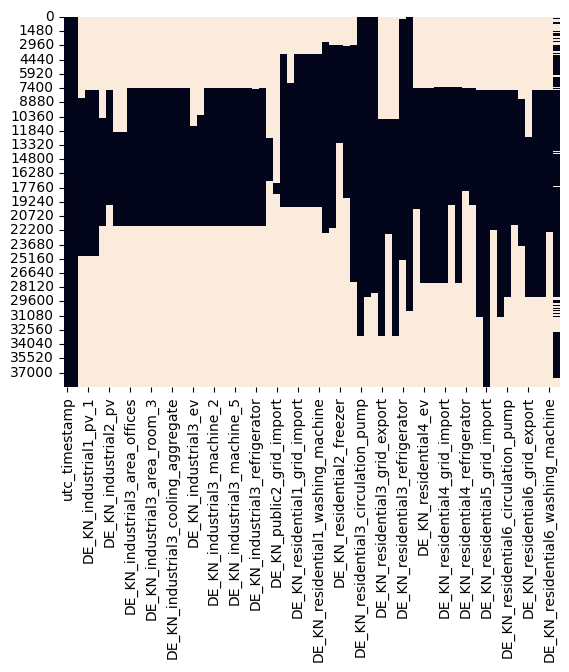

In [4]:
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [5]:
(df.isnull().mean() * 100).sort_values(ascending=False)

DE_KN_public2_grid_import              97.077027
DE_KN_public1_grid_import              88.167681
DE_KN_industrial2_storage_charge       74.634628
DE_KN_industrial2_storage_decharge     74.634628
DE_KN_residential2_freezer             73.342175
                                         ...    
DE_KN_residential5_grid_import         19.893899
interpolated                           17.311593
DE_KN_residential3_circulation_pump    13.637073
cet_cest_timestamp                      0.000000
utc_timestamp                           0.000000
Length: 71, dtype: float64

In [6]:
# Step 1: Interpolate missing values ONLY on numeric columns
df1 = df.copy()

numeric_cols = df1.select_dtypes(include='number').columns
df1[numeric_cols] = df1[numeric_cols].interpolate(method='linear', axis=0, limit_direction='both')

# Step 2: Forward-fill any remaining NaNs
df1 = df1.ffill(axis=0)

# Step 3: Backward-fill any remaining NaNs
df1 = df1.bfill(axis=0)

# Step 4: Fill remaining NaNs (if any) with zero
df1 = df1.fillna(0)

# Optional: Remove 'interpolated' column if it exists
if 'interpolated' in df1.columns:
    df1 = df1.drop(columns=['interpolated'])
df1.infer_objects(copy=False)
# Cleaning, modern CSS styling with horizontal scroll
styles = """
<style>
    .dataframe-container {
        overflow-x: auto;
        padding: 10px 0;
    }
    table {
        border-collapse: collapse;
        width: max-content;
        min-width: 100%;
        font-family: 'Arial', sans-serif;
        font-size: 16px;
        border-radius: 8px;
        overflow: hidden;
        box-shadow: 0 4px 20px rgba(0,0,0,0.05);
        margin-top: 20px;
        table-layout: auto;
        word-wrap: break-word;
    }
    th, td {
        border: 1px solid #ddd;
        text-align: left;
        padding: 14px 20px;
        line-height: 1.5;
        vertical-align: middle;
    }
    th {
        background-color: #4CAF50;
        color: white;
        font-size: 16px;
        font-weight: bold;
    }
    tr:nth-child(even) {
        background-color: #f9f9f9;
    }
    tr:hover {
        background-color: #f1faff;
    }
</style>
"""

# Converting DataFrame to HTML
html_table = df1.head(5).to_html(index=False, escape=False)

# Wrapping the table in a div with horizontal scrolling
html_output = f"""
<div class="dataframe-container">
    {html_table}
</div>
"""

# Displaying styled, scrollable table
display(HTML(styles + html_output))

utc_timestamp,cet_cest_timestamp,DE_KN_industrial1_grid_import,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_grid_import,DE_KN_industrial2_pv,DE_KN_industrial2_storage_charge,DE_KN_industrial2_storage_decharge,DE_KN_industrial3_area_offices,DE_KN_industrial3_area_room_1,DE_KN_industrial3_area_room_2,DE_KN_industrial3_area_room_3,DE_KN_industrial3_area_room_4,DE_KN_industrial3_compressor,DE_KN_industrial3_cooling_aggregate,DE_KN_industrial3_cooling_pumps,DE_KN_industrial3_dishwasher,DE_KN_industrial3_ev,DE_KN_industrial3_grid_import,DE_KN_industrial3_machine_1,DE_KN_industrial3_machine_2,DE_KN_industrial3_machine_3,DE_KN_industrial3_machine_4,DE_KN_industrial3_machine_5,DE_KN_industrial3_pv_facade,DE_KN_industrial3_pv_roof,DE_KN_industrial3_refrigerator,DE_KN_industrial3_ventilation,DE_KN_public1_grid_import,DE_KN_public2_grid_import,DE_KN_residential1_dishwasher,DE_KN_residential1_freezer,DE_KN_residential1_grid_import,DE_KN_residential1_heat_pump,DE_KN_residential1_pv,DE_KN_residential1_washing_machine,DE_KN_residential2_circulation_pump,DE_KN_residential2_dishwasher,DE_KN_residential2_freezer,DE_KN_residential2_grid_import,DE_KN_residential2_washing_machine,DE_KN_residential3_circulation_pump,DE_KN_residential3_dishwasher,DE_KN_residential3_freezer,DE_KN_residential3_grid_export,DE_KN_residential3_grid_import,DE_KN_residential3_pv,DE_KN_residential3_refrigerator,DE_KN_residential3_washing_machine,DE_KN_residential4_dishwasher,DE_KN_residential4_ev,DE_KN_residential4_freezer,DE_KN_residential4_grid_export,DE_KN_residential4_grid_import,DE_KN_residential4_heat_pump,DE_KN_residential4_pv,DE_KN_residential4_refrigerator,DE_KN_residential4_washing_machine,DE_KN_residential5_dishwasher,DE_KN_residential5_grid_import,DE_KN_residential5_refrigerator,DE_KN_residential5_washing_machine,DE_KN_residential6_circulation_pump,DE_KN_residential6_dishwasher,DE_KN_residential6_freezer,DE_KN_residential6_grid_export,DE_KN_residential6_grid_import,DE_KN_residential6_pv,DE_KN_residential6_washing_machine
2014-12-11T17:00:00Z,2014-12-11T18:00:00+0100,0.5,0.185,0.115,1.874,0.369,0.0,0.0,4.913,0.75,4.009,0.671,10.415,11.449,0.266,19.917,0.129,0.0,72.75,42.782,18.614,23.502,0.0,0.208,0.051,0.367,0.024,29.1,1.105,22.15,0.0,0.005,0.107,0.01,0.135,0.0,0.045,0.0,0.0,0.07,0.0,0.063,0.000,0.002,0.0,0.369,0.0,0.0,0.0,0.002,1.043,0.014,0.0,0.052,0.01,0.0,0.0,0.001,0.0,0.045,0.0,0.0,0.056,0.0,0.031,0.4,2.39,0.0,0.0
2014-12-11T18:00:00Z,2014-12-11T19:00:00+0100,0.5,0.185,0.115,1.874,0.369,0.0,0.0,4.913,0.75,4.009,0.671,10.415,11.449,0.266,19.917,0.129,0.0,72.75,42.782,18.614,23.502,0.0,0.208,0.051,0.367,0.024,29.1,1.105,22.15,0.0,0.005,0.107,0.01,0.135,0.0,0.045,0.0,0.0,0.07,0.0,0.063,0.003,0.024,0.0,0.369,0.0,0.0,0.0,0.002,1.043,0.014,0.0,0.052,0.01,0.0,0.0,0.001,0.0,0.045,0.0,0.0,0.056,0.0,0.031,0.4,2.39,0.0,0.0
2014-12-11T19:00:00Z,2014-12-11T20:00:00+0100,0.5,0.185,0.115,1.874,0.369,0.0,0.0,4.913,0.75,4.009,0.671,10.415,11.449,0.266,19.917,0.129,0.0,72.75,42.782,18.614,23.502,0.0,0.208,0.051,0.367,0.024,29.1,1.105,22.15,0.0,0.005,0.107,0.01,0.135,0.0,0.045,0.0,0.0,0.07,0.0,0.132,0.005,0.064,0.0,0.369,0.0,0.0,0.0,0.002,1.043,0.014,0.0,0.052,0.01,0.0,0.0,0.001,0.0,0.045,0.0,0.0,0.056,0.0,0.031,0.4,2.39,0.0,0.0
2014-12-11T20:00:00Z,2014-12-11T21:00:00+0100,0.5,0.185,0.115,1.874,0.369,0.0,0.0,4.913,0.75,4.009,0.671,10.415,11.449,0.266,19.917,0.129,0.0,72.75,42.782,18.614,23.502,0.0,0.208,0.051,0.367,0.024,29.1,1.105,22.15,0.0,0.005,0.107,0.01,0.135,0.0,0.045,0.0,0.0,0.07,0.0,0.200,0.008,0.102,0.0,0.369,0.0,0.0,0.0,0.002,1.043,0.014,0.0,0.052,0.01,0.0,0.0,0.001,0.0,0.045,0.0,0.0,0.056,0.0,0.031,0.4,2.39,0.0,0.0
2014-12-11T21:00:00Z,2014-12-11T22:00:00+0100,0.5,0.185,0.115,1.874,0.369,0.0,0.0,4.913,0.75,4.009,0.671,10.415,11.449,0.266,19.917,0.129,0.0,72.75,42.782,18.614,23.502,0.0,0.208,0.051,0.367,0.024,29.1,1.105,22.15,0.0,0.005,0.107,0.01,0.135,0.0,0.045,0.0,0.0,0.07,0.0,0.269,0.010,0.106,0.0,0.369,0.0,0.0,0.0,0.002,1.043,0.014,0.0,0.052,0

In [7]:
# Industrial columns
industrial_cols = [col for col in df1.columns if 'industrial' in col]

# Residential columns
residential_cols = [col for col in df1.columns if 'residential' in col]

# Keep timestamps too if you want to align them later
timestamps = ['utc_timestamp', 'cet_cest_timestamp']

# Creating separate DataFrames
industrial_df = df1[timestamps + industrial_cols]
residential_df = df1[timestamps + residential_cols]

# Preview
display(industrial_df.head())
display(residential_df.head())

,utc_timestamp,cet_cest_timestamp,DE_KN_industrial1_grid_import,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_grid_import,DE_KN_industrial2_pv,DE_KN_industrial2_storage_charge,DE_KN_industrial2_storage_decharge,DE_KN_industrial3_area_offices,...,DE_KN_industrial3_grid_import,DE_KN_industrial3_machine_1,DE_KN_industrial3_machine_2,DE_KN_industrial3_machine_3,DE_KN_industrial3_machine_4,DE_KN_industrial3_machine_5,DE_KN_industrial3_pv_facade,DE_KN_industrial3_pv_roof,DE_KN_industrial3_refrigerator,DE_KN_industrial3_ventilation
0,2014-12-11T17:00:00Z,2014-12-11T18:00:00+0100,0.5,0.185,0.115,1.874,0.369,0.0,0.0,4.913,...,72.75,42.782,18.614,23.502,0.0,0.208,0.051,0.367,0.024,29.1
1,2014-12-11T18:00:00Z,2014-12-11T19:00:00+0100,0.5,0.185,0.115,1.874,0.369,0.0,0.0,4.913,...,72.75,42.782,18.614,23.502,0.0,0.208,0.051,0.367,0.024,29.1
2,2014-12-11T19:00:00Z,2014-12-11T20:00:00+0100,0.5,0.185,0.115,1.874,0.369,0.0,0.0,4.913,...,72.75,42.782,18.614,23.502,0.0,0.208,0.051,0.367,0.024,29.1
3,2014-12-11T20:00:00Z,2014-12-11T21:00:00+0100,0.5,0.185,0.115,1.874,0.369,0.0,0.0,4.913,...,72.75,42.782,18.614,23.502,0.0,0.208,0.051,0.367,0.024,29.1
4,2014-12-11T21:00:00Z,2014-12-11T22:00:00+0100,0.5,0.185,0.115,1.874,0.369,0.0,0.0,4.913,...,72.75,42.782,18.614,23.502,0.0,0.208,0.051,0.367,0.024,29.1


,utc_timestamp,cet_cest_timestamp,DE_KN_residential1_dishwasher,DE_KN_residential1_freezer,DE_KN_residential1_grid_import,DE_KN_residential1_heat_pump,DE_KN_residential1_pv,DE_KN_residential1_washing_machine,DE_KN_residential2_circulation_pump,DE_KN_residential2_dishwasher,...,DE_KN_residential5_grid_import,DE_KN_residential5_refrigerator,DE_KN_residential5_washing_machine,DE_KN_residential6_circulation_pump,DE_KN_residential6_dishwasher,DE_KN_residential6_freezer,DE_KN_residential6_grid_export,DE_KN_residential6_grid_import,DE_KN_residential6_pv,DE_KN_residential6_washing_machine
0,2014-12-11T17:00:00Z,2014-12-11T18:00:00+0100,0.0,0.005,0.107,0.01,0.135,0.0,0.045,0.0,...,0.045,0.0,0.0,0.056,0.0,0.031,0.4,2.39,0.0,0.0
1,2014-12-11T18:00:00Z,2014-12-11T19:00:00+0100,0.0,0.005,0.107,0.01,0.135,0.0,0.045,0.0,...,0.045,0.0,0.0,0.056,0.0,0.031,0.4,2.39,0.0,0.0
2,2014-12-11T19:00:00Z,2014-12-11T20:00:00+0100,0.0,0.005,0.107,0.01,0.135,0.0,0.045,0.0,...,0.045,0.0,0.0,0.056,0.0,0.031,0.4,2.39,0.0,0.0
3,2014-12-11T20:00:00Z,2014-12-11T21:00:00+0100,0.0,0.005,0.107,0.01,0.135,0.0,0.045,0.0,...,0.045,0.0,0.0,0.056,0.0,0.031,0.4,2.39,0.0,0.0
4,2014-12-11T21:00:00Z,2014-12-11T22:00:00+0100,0.0,0.005,0.107,0.01,0.135,0.0,0.045,0.0,...,0.045,0.0,0.0,0.056,0.0,0.031,0.4,2.39,0.0,0.0


In [8]:
# Industrial 1 columns
industrial1_cols = [col for col in industrial_df.columns if 'industrial1' in col]

# Industrial 2 columns
industrial2_cols = [col for col in industrial_df.columns if 'industrial2' in col]

# Industrial 3 columns
industrial3_cols = [col for col in industrial_df.columns if 'industrial3' in col]

# Timestamps to retain in each
timestamps = ['utc_timestamp', 'cet_cest_timestamp']

# Creating separate DataFrames
industrial1_df = industrial_df[timestamps + industrial1_cols]
industrial2_df = industrial_df[timestamps + industrial2_cols]
industrial3_df = industrial_df[timestamps + industrial3_cols]

# Quick previews
display(industrial1_df.head())
display(industrial2_df.head())
display(industrial3_df.head())

,utc_timestamp,cet_cest_timestamp,DE_KN_industrial1_grid_import,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2
0,2014-12-11T17:00:00Z,2014-12-11T18:00:00+0100,0.5,0.185,0.115
1,2014-12-11T18:00:00Z,2014-12-11T19:00:00+0100,0.5,0.185,0.115
2,2014-12-11T19:00:00Z,2014-12-11T20:00:00+0100,0.5,0.185,0.115
3,2014-12-11T20:00:00Z,2014-12-11T21:00:00+0100,0.5,0.185,0.115
4,2014-12-11T21:00:00Z,2014-12-11T22:00:00+0100,0.5,0.185,0.115


,utc_timestamp,cet_cest_timestamp,DE_KN_industrial2_grid_import,DE_KN_industrial2_pv,DE_KN_industrial2_storage_charge,DE_KN_industrial2_storage_decharge
0,2014-12-11T17:00:00Z,2014-12-11T18:00:00+0100,1.874,0.369,0.0,0.0
1,2014-12-11T18:00:00Z,2014-12-11T19:00:00+0100,1.874,0.369,0.0,0.0
2,2014-12-11T19:00:00Z,2014-12-11T20:00:00+0100,1.874,0.369,0.0,0.0
3,2014-12-11T20:00:00Z,2014-12-11T21:00:00+0100,1.874,0.369,0.0,0.0
4,2014-12-11T21:00:00Z,2014-12-11T22:00:00+0100,1.874,0.369,0.0,0.0


,utc_timestamp,cet_cest_timestamp,DE_KN_industrial3_area_offices,DE_KN_industrial3_area_room_1,DE_KN_industrial3_area_room_2,DE_KN_industrial3_area_room_3,DE_KN_industrial3_area_room_4,DE_KN_industrial3_compressor,DE_KN_industrial3_cooling_aggregate,DE_KN_industrial3_cooling_pumps,...,DE_KN_industrial3_grid_import,DE_KN_industrial3_machine_1,DE_KN_industrial3_machine_2,DE_KN_industrial3_machine_3,DE_KN_industrial3_machine_4,DE_KN_industrial3_machine_5,DE_KN_industrial3_pv_facade,DE_KN_industrial3_pv_roof,DE_KN_industrial3_refrigerator,DE_KN_industrial3_ventilation
0,2014-12-11T17:00:00Z,2014-12-11T18:00:00+0100,4.913,0.75,4.009,0.671,10.415,11.449,0.266,19.917,...,72.75,42.782,18.614,23.502,0.0,0.208,0.051,0.367,0.024,29.1
1,2014-12-11T18:00:00Z,2014-12-11T19:00:00+0100,4.913,0.75,4.009,0.671,10.415,11.449,0.266,19.917,...,72.75,42.782,18.614,23.502,0.0,0.208,0.051,0.367,0.024,29.1
2,2014-12-11T19:00:00Z,2014-12-11T20:00:00+0100,4.913,0.75,4.009,0.671,10.415,11.449,0.266,19.917,...,72.75,42.782,18.614,23.502,0.0,0.208,0.051,0.367,0.024,29.1
3,2014-12-11T20:00:00Z,2014-12-11T21:00:00+0100,4.913,0.75,4.009,0.671,10.415,11.449,0.266,19.917,...,72.75,42.782,18.614,23.502,0.0,0.208,0.051,0.367,0.024,29.1
4,2014-12-11T21:00:00Z,2014-12-11T22:00:00+0100,4.913,0.75,4.009,0.671,10.415,11.449,0.266,19.917,...,72.75,42.782,18.614,23.502,0.0,0.208,0.051,0.367,0.024,29.1


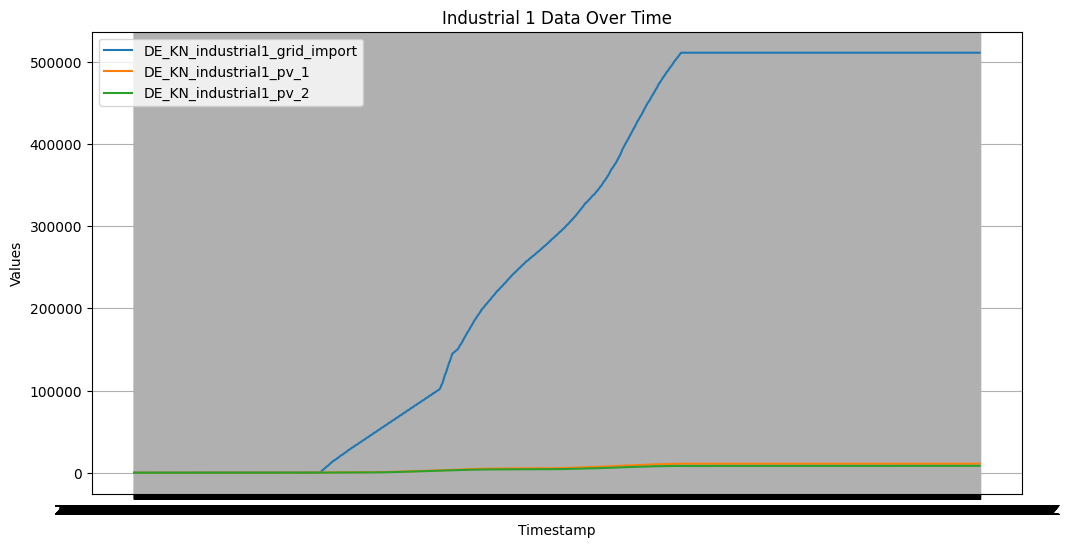

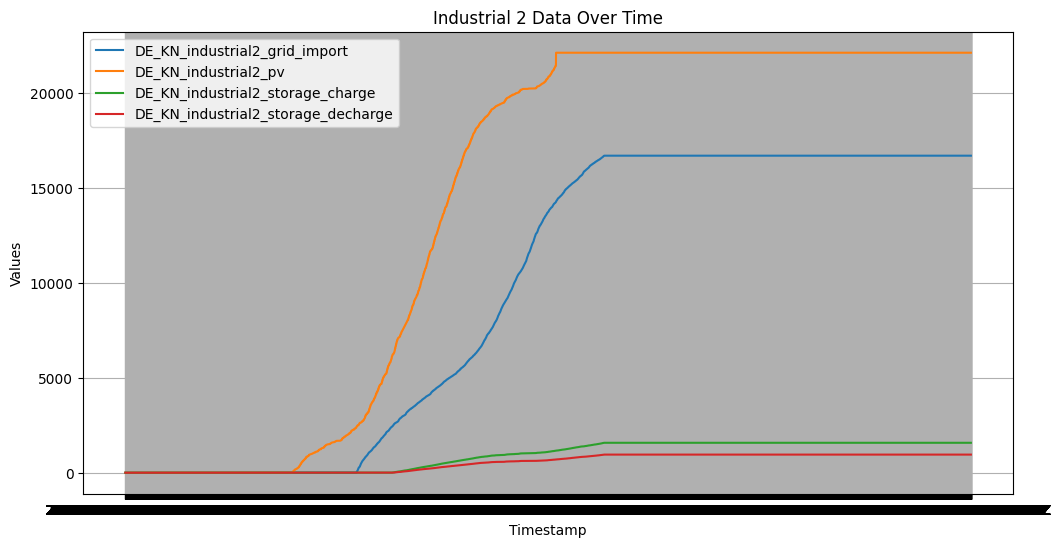

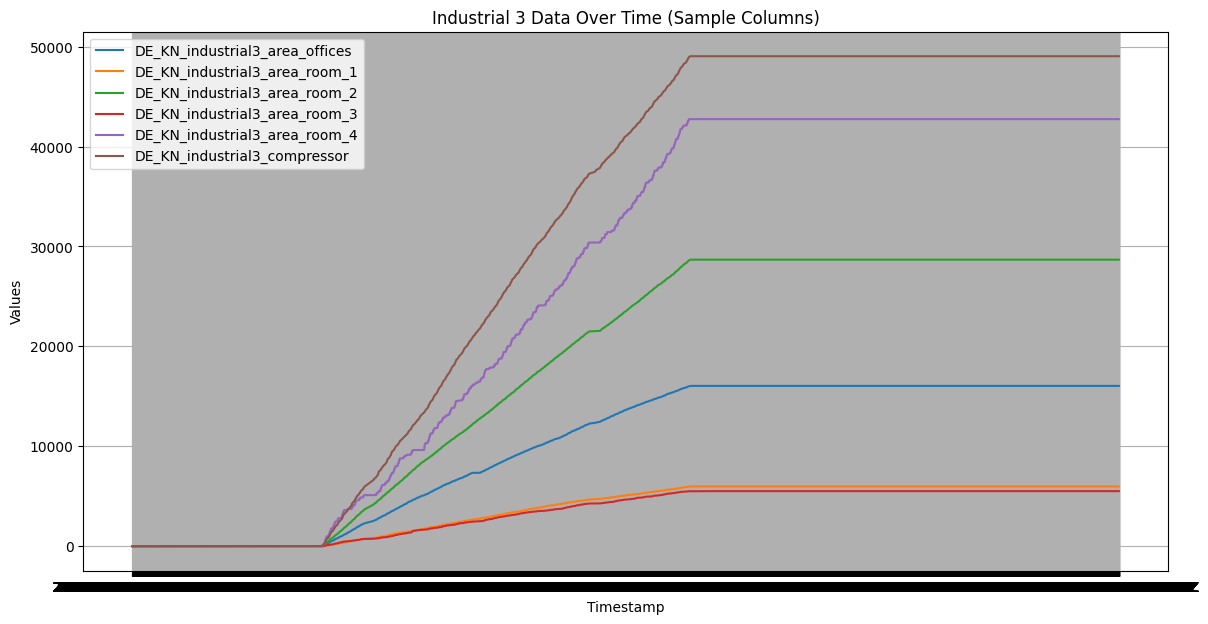

In [9]:
# 1️⃣ Plot for Industrial 1
plt.figure(figsize=(12, 6))
for col in industrial1_df.columns[2:]:
    plt.plot(industrial1_df['utc_timestamp'], industrial1_df[col], label=col)
plt.title('Industrial 1 Data Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()  # This will display the plot on the screen instead of saving

# 2️⃣ Plot for Industrial 2
plt.figure(figsize=(12, 6))
for col in industrial2_df.columns[2:]:
    plt.plot(industrial2_df['utc_timestamp'], industrial2_df[col], label=col)
plt.title('Industrial 2 Data Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()  # Display the plot

# 3️⃣ Plot for Industrial 3 (limit to first 6 columns for readability)
plt.figure(figsize=(14, 7))
for col in industrial3_df.columns[2:8]:
    plt.plot(industrial3_df['utc_timestamp'], industrial3_df[col], label=col)
plt.title('Industrial 3 Data Over Time (Sample Columns)')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()  # Display the plot


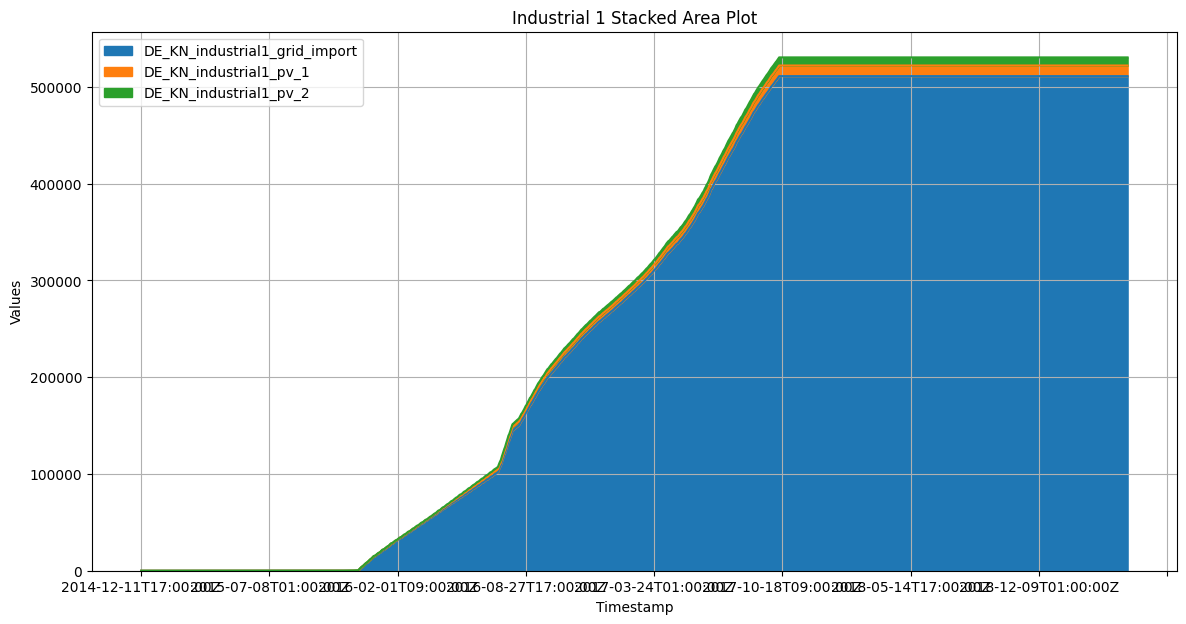

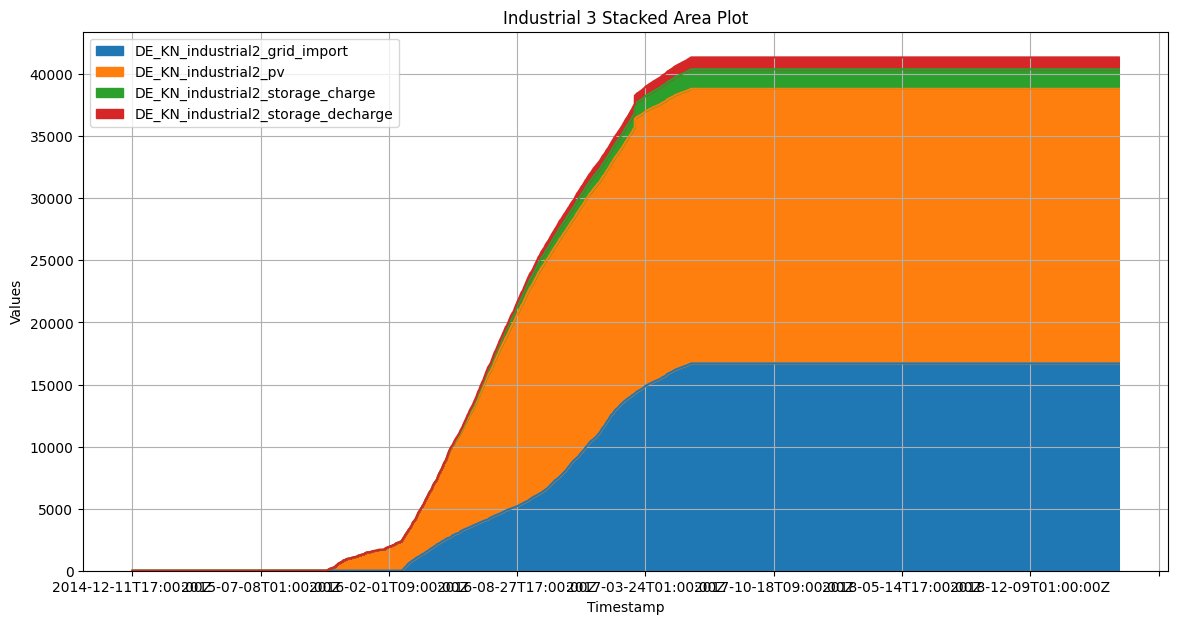

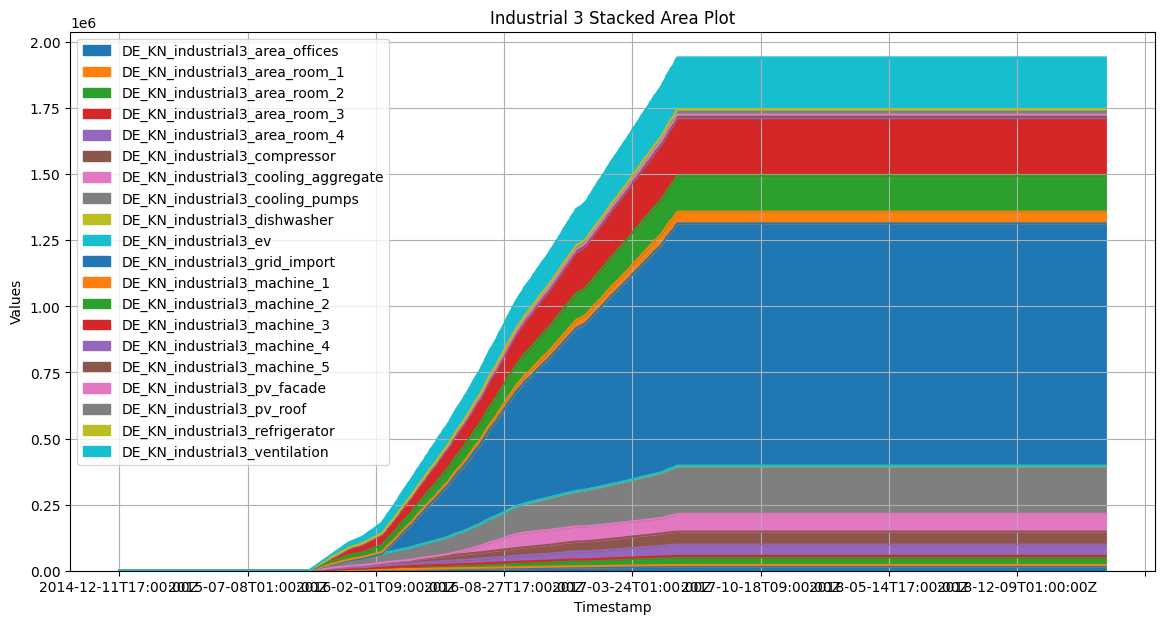

In [10]:
industrial1_df.set_index('utc_timestamp')[industrial1_df.columns[2:]].plot.area(stacked=True, figsize=(14,7))
plt.title('Industrial 1 Stacked Area Plot')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.grid(True)
plt.show()

industrial2_df.set_index('utc_timestamp')[industrial2_df.columns[2:]].plot.area(stacked=True, figsize=(14,7))
plt.title('Industrial 3 Stacked Area Plot')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.grid(True)
plt.show()

industrial3_df.set_index('utc_timestamp')[industrial3_df.columns[2:]].plot.area(stacked=True, figsize=(14,7))
plt.title('Industrial 3 Stacked Area Plot')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.grid(True)
plt.show()


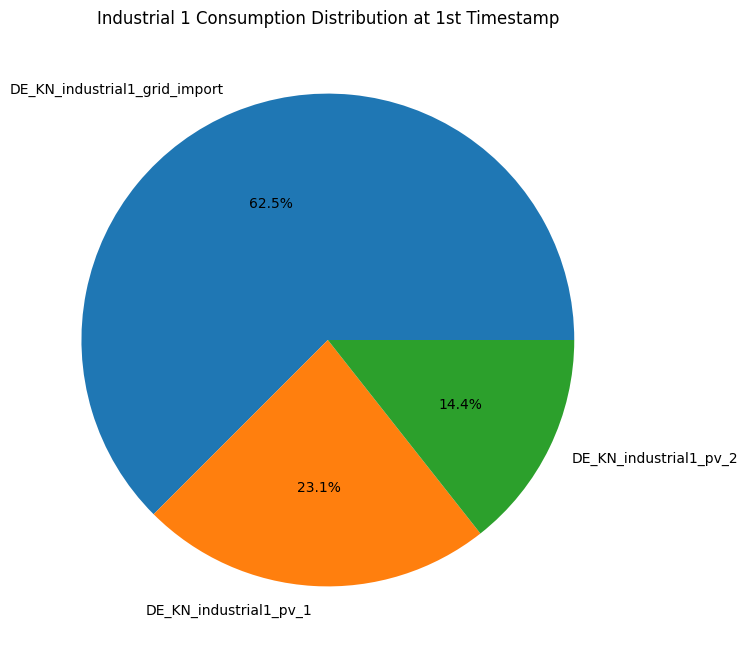

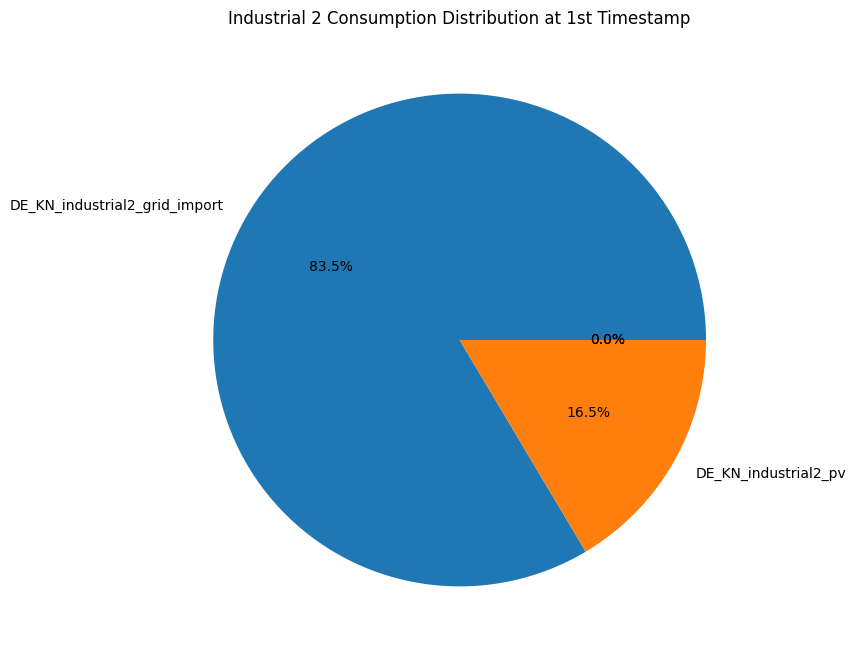

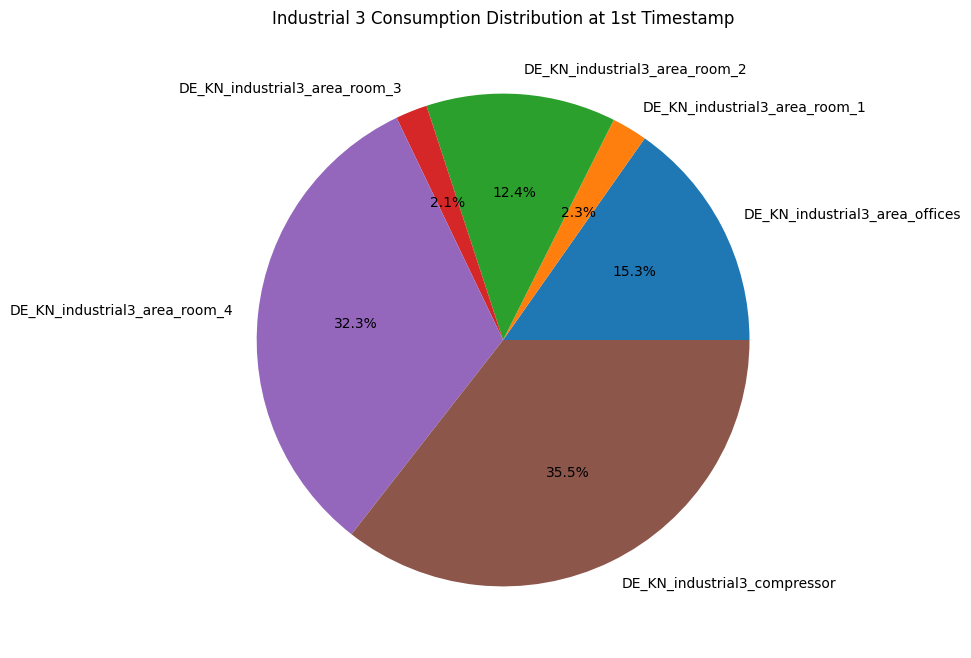

In [11]:
industrial1_df.iloc[0, 2:8] = pd.to_numeric(industrial1_df.iloc[0, 2:8], errors='coerce')
industrial1_df.iloc[0, 2:8].plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('Industrial 1 Consumption Distribution at 1st Timestamp')
plt.ylabel('')
plt.show()


industrial2_df.iloc[0, 2:8] = pd.to_numeric(industrial2_df.iloc[0, 2:8], errors='coerce')
industrial2_df.iloc[0, 2:8].plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('Industrial 2 Consumption Distribution at 1st Timestamp')
plt.ylabel('')
plt.show()


industrial3_df.iloc[0, 2:8] = pd.to_numeric(industrial3_df.iloc[0, 2:8], errors='coerce')
industrial3_df.iloc[0, 2:8].plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('Industrial 3 Consumption Distribution at 1st Timestamp')
plt.ylabel('')
plt.show()


In [12]:
print(industrial1_df['utc_timestamp'].dtype)
print(industrial2_df['utc_timestamp'].dtype)
print(industrial3_df['utc_timestamp'].dtype)

object
object
object


In [13]:
# ✅ Convert utc_timestamp to datetime safely and drop bad rows
for i, df in enumerate([industrial1_df, industrial2_df, industrial3_df], 1):
    df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'], errors='coerce')
    df.dropna(subset=['utc_timestamp'], inplace=True)
    print(f"industrial{i}_df: {df['utc_timestamp'].dtype}, {df['utc_timestamp'].isnull().sum()} nulls remaining")

# ✅ Add hour, day, and month columns safely
for df in [industrial1_df, industrial2_df, industrial3_df]:
    df['hour'] = df['utc_timestamp'].dt.hour
    df['day'] = df['utc_timestamp'].dt.date
    df['month'] = df['utc_timestamp'].dt.to_period('M')

# 📌 Define numeric columns
industrial1_cols = [col for col in industrial1_df.columns if col not in ['utc_timestamp', 'hour', 'day', 'month']]
industrial2_cols = [col for col in industrial2_df.columns if col not in ['utc_timestamp', 'hour', 'day', 'month']]
industrial3_cols = [col for col in industrial3_df.columns if col not in ['utc_timestamp', 'hour', 'day', 'month']]

# 📌 Convert numeric columns safely
for df in [industrial1_df, industrial2_df, industrial3_df]:
    for col in df.columns:
        if col not in ['utc_timestamp', 'hour', 'day', 'month']:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # invalid strings become NaN

# 📌 Aggregations
industrial1_hourly = industrial1_df.groupby('hour')[industrial1_cols].mean()
industrial2_hourly = industrial2_df.groupby('hour')[industrial2_cols].mean()
industrial3_hourly = industrial3_df.groupby('hour')[industrial3_cols].mean()

industrial1_daily = industrial1_df.groupby('day')[industrial1_cols].mean()
industrial2_daily = industrial2_df.groupby('day')[industrial2_cols].mean()
industrial3_daily = industrial3_df.groupby('day')[industrial3_cols].mean()

industrial1_monthly = industrial1_df.groupby('month')[industrial1_cols].mean()
industrial2_monthly = industrial2_df.groupby('month')[industrial2_cols].mean()
industrial3_monthly = industrial3_df.groupby('month')[industrial3_cols].mean()

# ✅ Safe display handling
try:
    from IPython.display import display
    ipy_available = True
except ImportError:
    ipy_available = False

def safe_display(df):
    if ipy_available:
        display(df)
    else:
        print(df)

# 📌 Display Results
print("✅ Hourly Analysis for Industrial 1")
safe_display(industrial1_hourly.head())

print("✅ Hourly Analysis for Industrial 2")
safe_display(industrial2_hourly.head())

print("✅ Hourly Analysis for Industrial 3")
safe_display(industrial3_hourly.head())

print("✅ Daily Analysis for Industrial 1")
safe_display(industrial1_daily.head())

print("✅ Daily Analysis for Industrial 2")
safe_display(industrial2_daily.head())

print("✅ Daily Analysis for Industrial 3")
safe_display(industrial3_daily.head())

print("✅ Monthly Analysis for Industrial 1")
safe_display(industrial1_monthly.head())

print("✅ Monthly Analysis for Industrial 2")
safe_display(industrial2_monthly.head())

print("✅ Monthly Analysis for Industrial 3")
safe_display(industrial3_monthly.head())

industrial1_df: datetime64[ns, UTC], 0 nulls remaining
industrial2_df: datetime64[ns, UTC], 0 nulls remaining
industrial3_df: datetime64[ns, UTC], 0 nulls remaining


C:\Users\oppor\AppData\Local\Temp\ipykernel_5512\1633564168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'], errors='coerce')
C:\Users\oppor\AppData\Local\Temp\ipykernel_5512\1633564168.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['utc_timestamp'], inplace=True)
C:\Users\oppor\AppData\Local\Temp\ipykernel_5512\1633564168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

✅ Hourly Analysis for Industrial 1


,cet_cest_timestamp,DE_KN_industrial1_grid_import,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2
hour,,,,
0,NaN,275151.835130,5916.455439,4551.673095
1,NaN,275162.084608,5916.455439,4551.673095
2,NaN,275171.191939,5916.455439,4551.673095
3,NaN,275180.079426,5916.455564,4551.673095
4,NaN,275189.195009,5916.464439,4551.673823


✅ Hourly Analysis for Industrial 2


,cet_cest_timestamp,DE_KN_industrial2_grid_import,DE_KN_industrial2_pv,DE_KN_industrial2_storage_charge,DE_KN_industrial2_storage_decharge
hour,,,,,
0,NaN,9585.976211,14200.909848,893.070299,541.694862
1,NaN,9586.471526,14200.909848,893.075456,541.697371
2,NaN,9586.963843,14200.909848,893.080612,541.698194
3,NaN,9587.457822,14200.910457,893.085707,541.698199
4,NaN,9587.948209,14200.932335,893.090793,541.698206


✅ Hourly Analysis for Industrial 3


,cet_cest_timestamp,DE_KN_industrial3_area_offices,DE_KN_industrial3_area_room_1,DE_KN_industrial3_area_room_2,DE_KN_industrial3_area_room_3,DE_KN_industrial3_area_room_4,DE_KN_industrial3_compressor,DE_KN_industrial3_cooling_aggregate,DE_KN_industrial3_cooling_pumps,DE_KN_industrial3_dishwasher,...,DE_KN_industrial3_grid_import,DE_KN_industrial3_machine_1,DE_KN_industrial3_machine_2,DE_KN_industrial3_machine_3,DE_KN_industrial3_machine_4,DE_KN_industrial3_machine_5,DE_KN_industrial3_pv_facade,DE_KN_industrial3_pv_roof,DE_KN_industrial3_refrigerator,DE_KN_industrial3_ventilation
hour,,,,,,,,,,,,,,,,,,,,,
0,NaN,10139.161735,3772.919341,17925.471959,3474.967921,26131.727261,30671.784474,40825.339182,111796.504650,550.846297,...,535301.262160,27109.059637,84744.703154,134445.901788,287.780294,2813.063436,5090.789988,11821.778708,293.780122,121456.160358
1,NaN,10139.377949,3772.982707,17925.958446,3474.982498,26131.741599,30672.531436,40826.190491,111800.939280,550.846354,...,535319.356911,27109.154537,84748.135060,134451.429650,287.789140,2813.152270,5090.789988,11821.778708,293.791632,121459.539225
2,NaN,10139.597388,3773.046149,17926.443720,3474.997221,26131.755955,30673.274810,40826.875205,111805.326649,550.846408,...,535337.229778,27109.249240,84751.565130,134456.953685,287.794998,2813.241057,5090.789988,11821.778708,293.803379,121462.924817
3,NaN,10139.815381,3773.109376,17926.924998,3475.011699,26131.770057,30674.019112,40827.466110,111809.683273,550.846473,...,535354.996190,27109.357478,84754.992821,134462.475375,287.798819,2813.329647,5090.789993,11821.779856,293.814667,121466.312050
4,NaN,10140.064131,3773.172158,17927.397839,3475.026637,26131.785452,30674.756507,40827.971554,111814.015222,550.846534,...,535372.674900,27109.501084,84758.416582,134467.991376,287.802529,2813.417988,5090.793270,11821.806842,293.826031,121469.697725


✅ Daily Analysis for Industrial 1


,cet_cest_timestamp,DE_KN_industrial1_grid_import,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2
day,,,,
2014-12-11,NaN,0.5,0.185,0.115
2014-12-12,NaN,0.5,0.185,0.115
2014-12-13,NaN,0.5,0.185,0.115
2014-12-14,NaN,0.5,0.185,0.115
2014-12-15,NaN,0.5,0.185,0.115


✅ Daily Analysis for Industrial 2


,cet_cest_timestamp,DE_KN_industrial2_grid_import,DE_KN_industrial2_pv,DE_KN_industrial2_storage_charge,DE_KN_industrial2_storage_decharge
day,,,,,
2014-12-11,NaN,1.874,0.369,0.0,0.0
2014-12-12,NaN,1.874,0.369,0.0,0.0
2014-12-13,NaN,1.874,0.369,0.0,0.0
2014-12-14,NaN,1.874,0.369,0.0,0.0
2014-12-15,NaN,1.874,0.369,0.0,0.0


✅ Daily Analysis for Industrial 3


,cet_cest_timestamp,DE_KN_industrial3_area_offices,DE_KN_industrial3_area_room_1,DE_KN_industrial3_area_room_2,DE_KN_industrial3_area_room_3,DE_KN_industrial3_area_room_4,DE_KN_industrial3_compressor,DE_KN_industrial3_cooling_aggregate,DE_KN_industrial3_cooling_pumps,DE_KN_industrial3_dishwasher,...,DE_KN_industrial3_grid_import,DE_KN_industrial3_machine_1,DE_KN_industrial3_machine_2,DE_KN_industrial3_machine_3,DE_KN_industrial3_machine_4,DE_KN_industrial3_machine_5,DE_KN_industrial3_pv_facade,DE_KN_industrial3_pv_roof,DE_KN_industrial3_refrigerator,DE_KN_industrial3_ventilation
day,,,,,,,,,,,,,,,,,,,,,
2014-12-11,NaN,4.913,0.75,4.009,0.671,10.415,11.449,0.266,19.917,0.129,...,72.75,42.782,18.614,23.502,0.0,0.208,0.051,0.367,0.024,29.1
2014-12-12,NaN,4.913,0.75,4.009,0.671,10.415,11.449,0.266,19.917,0.129,...,72.75,42.782,18.614,23.502,0.0,0.208,0.051,0.367,0.024,29.1
2014-12-13,NaN,4.913,0.75,4.009,0.671,10.415,11.449,0.266,19.917,0.129,...,72.75,42.782,18.614,23.502,0.0,0.208,0.051,0.367,0.024,29.1
2014-12-14,NaN,4.913,0.75,4.009,0.671,10.415,11.449,0.266,19.917,0.129,...,72.75,42.782,18.614,23.502,0.0,0.208,0.051,0.367,0.024,29.1
2014-12-15,NaN,4.913,0.75,4.009,0.671,10.415,11.449,0.266,19.917,0.129,...,72.75,42.782,18.614,23.502,0.0,0.208,0.051,0.367,0.024,29.1


✅ Monthly Analysis for Industrial 1


,cet_cest_timestamp,DE_KN_industrial1_grid_import,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2
month,,,,
2014-12,NaN,0.5,0.185,0.115
2015-01,NaN,0.5,0.185,0.115
2015-02,NaN,0.5,0.185,0.115
2015-03,NaN,0.5,0.185,0.115
2015-04,NaN,0.5,0.185,0.115


✅ Monthly Analysis for Industrial 2


,cet_cest_timestamp,DE_KN_industrial2_grid_import,DE_KN_industrial2_pv,DE_KN_industrial2_storage_charge,DE_KN_industrial2_storage_decharge
month,,,,,
2014-12,NaN,1.874,0.369,0.0,0.0
2015-01,NaN,1.874,0.369,0.0,0.0
2015-02,NaN,1.874,0.369,0.0,0.0
2015-03,NaN,1.874,0.369,0.0,0.0
2015-04,NaN,1.874,0.369,0.0,0.0


✅ Monthly Analysis for Industrial 3


,cet_cest_timestamp,DE_KN_industrial3_area_offices,DE_KN_industrial3_area_room_1,DE_KN_industrial3_area_room_2,DE_KN_industrial3_area_room_3,DE_KN_industrial3_area_room_4,DE_KN_industrial3_compressor,DE_KN_industrial3_cooling_aggregate,DE_KN_industrial3_cooling_pumps,DE_KN_industrial3_dishwasher,...,DE_KN_industrial3_grid_import,DE_KN_industrial3_machine_1,DE_KN_industrial3_machine_2,DE_KN_industrial3_machine_3,DE_KN_industrial3_machine_4,DE_KN_industrial3_machine_5,DE_KN_industrial3_pv_facade,DE_KN_industrial3_pv_roof,DE_KN_industrial3_refrigerator,DE_KN_industrial3_ventilation
month,,,,,,,,,,,,,,,,,,,,,
2014-12,NaN,4.913,0.75,4.009,0.671,10.415,11.449,0.266,19.917,0.129,...,72.75,42.782,18.614,23.502,0.0,0.208,0.051,0.367,0.024,29.1
2015-01,NaN,4.913,0.75,4.009,0.671,10.415,11.449,0.266,19.917,0.129,...,72.75,42.782,18.614,23.502,0.0,0.208,0.051,0.367,0.024,29.1
2015-02,NaN,4.913,0.75,4.009,0.671,10.415,11.449,0.266,19.917,0.129,...,72.75,42.782,18.614,23.502,0.0,0.208,0.051,0.367,0.024,29.1
2015-03,NaN,4.913,0.75,4.009,0.671,10.415,11.449,0.266,19.917,0.129,...,72.75,42.782,18.614,23.502,0.0,0.208,0.051,0.367,0.024,29.1
2015-04,NaN,4.913,0.75,4.009,0.671,10.415,11.449,0.266,19.917,0.129,...,72.75,42.782,18.614,23.502,0.0,0.208,0.051,0.367,0.024,29.1


C:\Users\oppor\AppData\Local\Temp\ipykernel_5512\1071853218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industrial1_df.loc[:, 'total_usage'] = industrial1_df[['DE_KN_industrial1_grid_import', 'DE_KN_industrial1_pv_1', 'DE_KN_industrial1_pv_2']].sum(axis=1)
C:\Users\oppor\AppData\Local\Temp\ipykernel_5512\1071853218.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industrial2_df.loc[:, 'total_usage'] = industrial2_df[['DE_KN_industrial2_grid_import', 'DE_KN_industrial2_pv', 'DE_KN_industrial2_stor

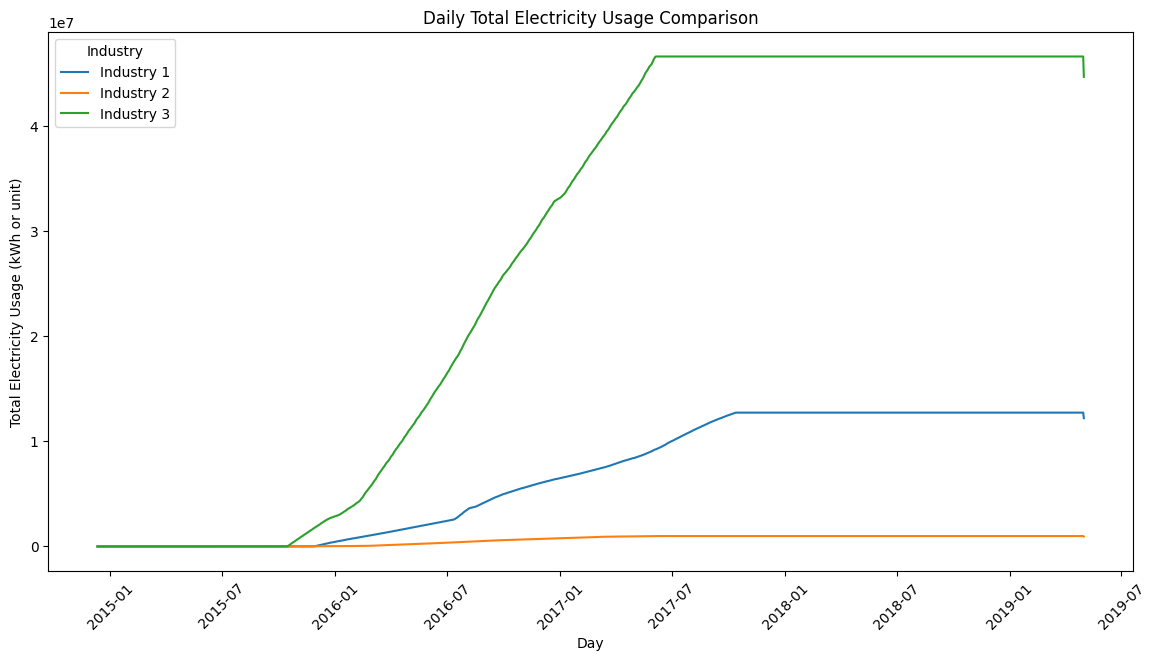

In [14]:
# Industry 1 total usage per record
industrial1_df.loc[:, 'total_usage'] = industrial1_df[['DE_KN_industrial1_grid_import', 'DE_KN_industrial1_pv_1', 'DE_KN_industrial1_pv_2']].sum(axis=1)

# Industry 2 total usage per record
industrial2_df.loc[:, 'total_usage'] = industrial2_df[['DE_KN_industrial2_grid_import', 'DE_KN_industrial2_pv', 'DE_KN_industrial2_storage_charge', 'DE_KN_industrial2_storage_decharge']].sum(axis=1)

# Industry 3 total usage per record
cols_industrial3 = [col for col in industrial3_df.columns if col.startswith('DE_KN_industrial3_')]
industrial3_df.loc[:, 'total_usage'] = industrial3_df[cols_industrial3].sum(axis=1)

# Groupping by 'day'
industrial1_daily = industrial1_df.groupby('day')['total_usage'].sum().reset_index().assign(industry='Industry 1')
industrial2_daily = industrial2_df.groupby('day')['total_usage'].sum().reset_index().assign(industry='Industry 2')
industrial3_daily = industrial3_df.groupby('day')['total_usage'].sum().reset_index().assign(industry='Industry 3')

# Combining them
daily_usage = pd.concat([industrial1_daily, industrial2_daily, industrial3_daily])

plt.figure(figsize=(14,7))
sns.lineplot(data=daily_usage, x='day', y='total_usage', hue='industry')
plt.title('Daily Total Electricity Usage Comparison')
plt.xlabel('Day')
plt.ylabel('Total Electricity Usage (kWh or unit)')
plt.xticks(rotation=45)
plt.legend(title='Industry')
plt.show()


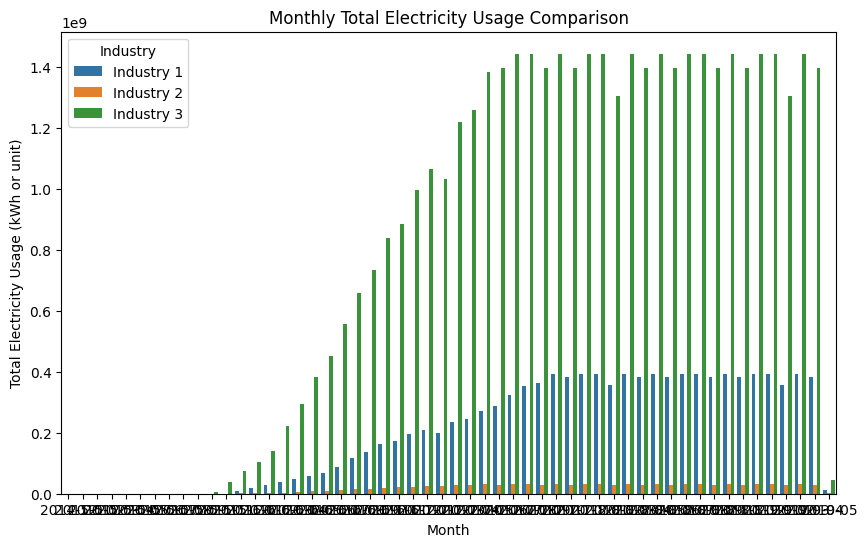

In [15]:
# Groupping by 'month'
industrial1_monthly = industrial1_df.groupby('month')['total_usage'].sum().reset_index().assign(industry='Industry 1')
industrial2_monthly = industrial2_df.groupby('month')['total_usage'].sum().reset_index().assign(industry='Industry 2')
industrial3_monthly = industrial3_df.groupby('month')['total_usage'].sum().reset_index().assign(industry='Industry 3')

# Combineing
monthly_usage = pd.concat([industrial1_monthly, industrial2_monthly, industrial3_monthly])

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(data=monthly_usage, x='month', y='total_usage', hue='industry')
plt.title('Monthly Total Electricity Usage Comparison')
plt.xlabel('Month')
plt.ylabel('Total Electricity Usage (kWh or unit)')
plt.legend(title='Industry')
plt.show()


C:\Users\oppor\AppData\Local\Temp\ipykernel_5512\2126625582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industrial1_df.loc[:, 'year'] = industrial1_df['utc_timestamp'].dt.year
C:\Users\oppor\AppData\Local\Temp\ipykernel_5512\2126625582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industrial2_df.loc[:, 'year'] = industrial2_df['utc_timestamp'].dt.year
C:\Users\oppor\AppData\Local\Temp\ipykernel_5512\2126625582.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

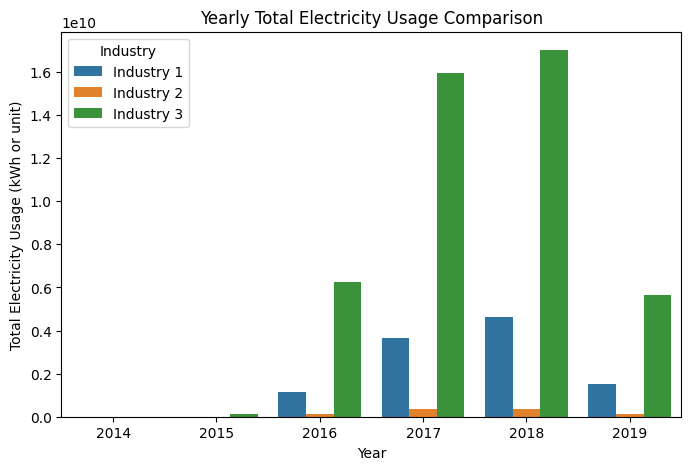

In [16]:
industrial1_df.loc[:, 'year'] = industrial1_df['utc_timestamp'].dt.year
industrial2_df.loc[:, 'year'] = industrial2_df['utc_timestamp'].dt.year
industrial3_df.loc[:, 'year'] = industrial3_df['utc_timestamp'].dt.year

industrial1_yearly = industrial1_df.groupby('year')['total_usage'].sum().reset_index().assign(industry='Industry 1')
industrial2_yearly = industrial2_df.groupby('year')['total_usage'].sum().reset_index().assign(industry='Industry 2')
industrial3_yearly = industrial3_df.groupby('year')['total_usage'].sum().reset_index().assign(industry='Industry 3')

# Combining them
yearly_usage = pd.concat([industrial1_yearly, industrial2_yearly, industrial3_yearly])

plt.figure(figsize=(8,5))
sns.barplot(data=yearly_usage, x='year', y='total_usage', hue='industry')
plt.title('Yearly Total Electricity Usage Comparison')
plt.xlabel('Year')
plt.ylabel('Total Electricity Usage (kWh or unit)')
plt.legend(title='Industry')
plt.show()


In [17]:
# Industrial 1 columns
residential1_cols = [col for col in residential_df.columns if 'residential1' in col]

# Industrial 2 columns
residential2_cols = [col for col in residential_df.columns if 'residential2' in col]

# Industrial 3 columns
residential3_cols = [col for col in residential_df.columns if 'residential3' in col]
residential4_cols = [col for col in residential_df.columns if 'residential4' in col]
residential5_cols = [col for col in residential_df.columns if 'residential5' in col]
residential6_cols = [col for col in residential_df.columns if 'residential6' in col]


# Timestamps to retain in each
timestamps = ['utc_timestamp', 'cet_cest_timestamp']

# Creating separate DataFrames
residential1_df = residential_df[timestamps + residential1_cols]
residential2_df = residential_df[timestamps + residential2_cols]
residential3_df = residential_df[timestamps + residential3_cols]
residential4_df = residential_df[timestamps + residential4_cols]
residential5_df = residential_df[timestamps + residential5_cols]
residential6_df = residential_df[timestamps + residential6_cols]

# Quick previews
display(residential1_df.head())
display(residential2_df.head())
display(residential3_df.head())
display(residential4_df.head())
display(residential5_df.head())
display(residential6_df.head())

,utc_timestamp,cet_cest_timestamp,DE_KN_residential1_dishwasher,DE_KN_residential1_freezer,DE_KN_residential1_grid_import,DE_KN_residential1_heat_pump,DE_KN_residential1_pv,DE_KN_residential1_washing_machine
0,2014-12-11T17:00:00Z,2014-12-11T18:00:00+0100,0.0,0.005,0.107,0.01,0.135,0.0
1,2014-12-11T18:00:00Z,2014-12-11T19:00:00+0100,0.0,0.005,0.107,0.01,0.135,0.0
2,2014-12-11T19:00:00Z,2014-12-11T20:00:00+0100,0.0,0.005,0.107,0.01,0.135,0.0
3,2014-12-11T20:00:00Z,2014-12-11T21:00:00+0100,0.0,0.005,0.107,0.01,0.135,0.0
4,2014-12-11T21:00:00Z,2014-12-11T22:00:00+0100,0.0,0.005,0.107,0.01,0.135,0.0


,utc_timestamp,cet_cest_timestamp,DE_KN_residential2_circulation_pump,DE_KN_residential2_dishwasher,DE_KN_residential2_freezer,DE_KN_residential2_grid_import,DE_KN_residential2_washing_machine
0,2014-12-11T17:00:00Z,2014-12-11T18:00:00+0100,0.045,0.0,0.0,0.07,0.0
1,2014-12-11T18:00:00Z,2014-12-11T19:00:00+0100,0.045,0.0,0.0,0.07,0.0
2,2014-12-11T19:00:00Z,2014-12-11T20:00:00+0100,0.045,0.0,0.0,0.07,0.0
3,2014-12-11T20:00:00Z,2014-12-11T21:00:00+0100,0.045,0.0,0.0,0.07,0.0
4,2014-12-11T21:00:00Z,2014-12-11T22:00:00+0100,0.045,0.0,0.0,0.07,0.0


,utc_timestamp,cet_cest_timestamp,DE_KN_residential3_circulation_pump,DE_KN_residential3_dishwasher,DE_KN_residential3_freezer,DE_KN_residential3_grid_export,DE_KN_residential3_grid_import,DE_KN_residential3_pv,DE_KN_residential3_refrigerator,DE_KN_residential3_washing_machine
0,2014-12-11T17:00:00Z,2014-12-11T18:00:00+0100,0.063,0.000,0.002,0.0,0.369,0.0,0.0,0.0
1,2014-12-11T18:00:00Z,2014-12-11T19:00:00+0100,0.063,0.003,0.024,0.0,0.369,0.0,0.0,0.0
2,2014-12-11T19:00:00Z,2014-12-11T20:00:00+0100,0.132,0.005,0.064,0.0,0.369,0.0,0.0,0.0
3,2014-12-11T20:00:00Z,2014-12-11T21:00:00+0100,0.200,0.008,0.102,0.0,0.369,0.0,0.0,0.0
4,2014-12-11T21:00:00Z,2014-12-11T22:00:00+0100,0.269,0.010,0.106,0.0,0.369,0.0,0.0,0.0


,utc_timestamp,cet_cest_timestamp,DE_KN_residential4_dishwasher,DE_KN_residential4_ev,DE_KN_residential4_freezer,DE_KN_residential4_grid_export,DE_KN_residential4_grid_import,DE_KN_residential4_heat_pump,DE_KN_residential4_pv,DE_KN_residential4_refrigerator,DE_KN_residential4_washing_machine
0,2014-12-11T17:00:00Z,2014-12-11T18:00:00+0100,0.002,1.043,0.014,0.0,0.052,0.01,0.0,0.0,0.001
1,2014-12-11T18:00:00Z,2014-12-11T19:00:00+0100,0.002,1.043,0.014,0.0,0.052,0.01,0.0,0.0,0.001
2,2014-12-11T19:00:00Z,2014-12-11T20:00:00+0100,0.002,1.043,0.014,0.0,0.052,0.01,0.0,0.0,0.001
3,2014-12-11T20:00:00Z,2014-12-11T21:00:00+0100,0.002,1.043,0.014,0.0,0.052,0.01,0.0,0.0,0.001
4,2014-12-11T21:00:00Z,2014-12-11T22:00:00+0100,0.002,1.043,0.014,0.0,0.052,0.01,0.0,0.0,0.001


,utc_timestamp,cet_cest_timestamp,DE_KN_residential5_dishwasher,DE_KN_residential5_grid_import,DE_KN_residential5_refrigerator,DE_KN_residential5_washing_machine
0,2014-12-11T17:00:00Z,2014-12-11T18:00:00+0100,0.0,0.045,0.0,0.0
1,2014-12-11T18:00:00Z,2014-12-11T19:00:00+0100,0.0,0.045,0.0,0.0
2,2014-12-11T19:00:00Z,2014-12-11T20:00:00+0100,0.0,0.045,0.0,0.0
3,2014-12-11T20:00:00Z,2014-12-11T21:00:00+0100,0.0,0.045,0.0,0.0
4,2014-12-11T21:00:00Z,2014-12-11T22:00:00+0100,0.0,0.045,0.0,0.0


,utc_timestamp,cet_cest_timestamp,DE_KN_residential6_circulation_pump,DE_KN_residential6_dishwasher,DE_KN_residential6_freezer,DE_KN_residential6_grid_export,DE_KN_residential6_grid_import,DE_KN_residential6_pv,DE_KN_residential6_washing_machine
0,2014-12-11T17:00:00Z,2014-12-11T18:00:00+0100,0.056,0.0,0.031,0.4,2.39,0.0,0.0
1,2014-12-11T18:00:00Z,2014-12-11T19:00:00+0100,0.056,0.0,0.031,0.4,2.39,0.0,0.0
2,2014-12-11T19:00:00Z,2014-12-11T20:00:00+0100,0.056,0.0,0.031,0.4,2.39,0.0,0.0
3,2014-12-11T20:00:00Z,2014-12-11T21:00:00+0100,0.056,0.0,0.031,0.4,2.39,0.0,0.0
4,2014-12-11T21:00:00Z,2014-12-11T22:00:00+0100,0.056,0.0,0.031,0.4,2.39,0.0,0.0


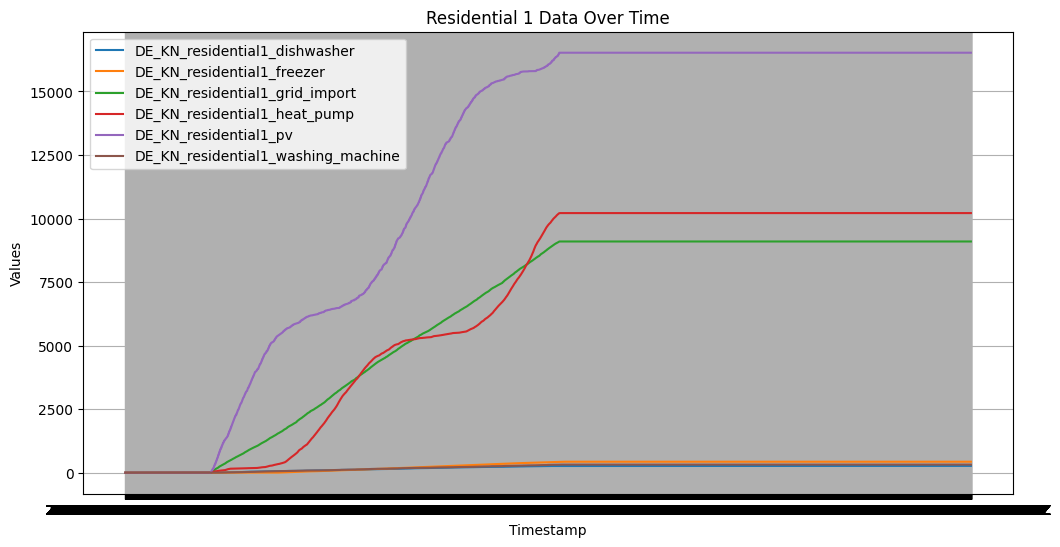

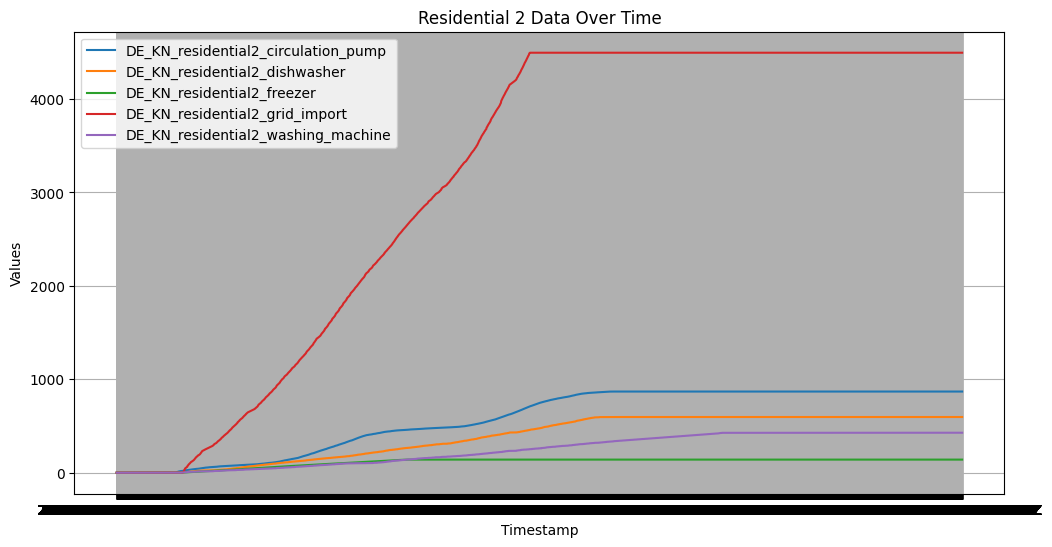

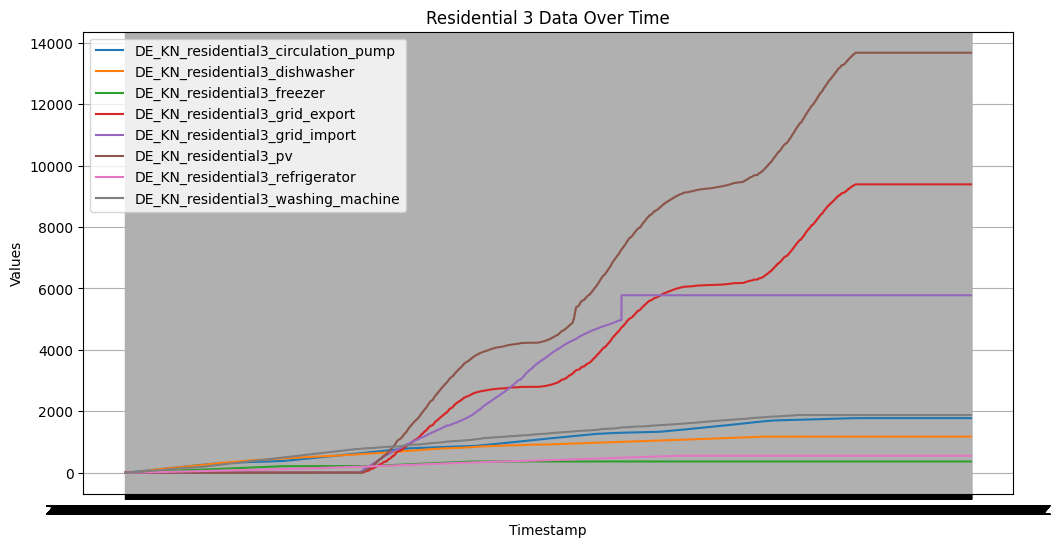

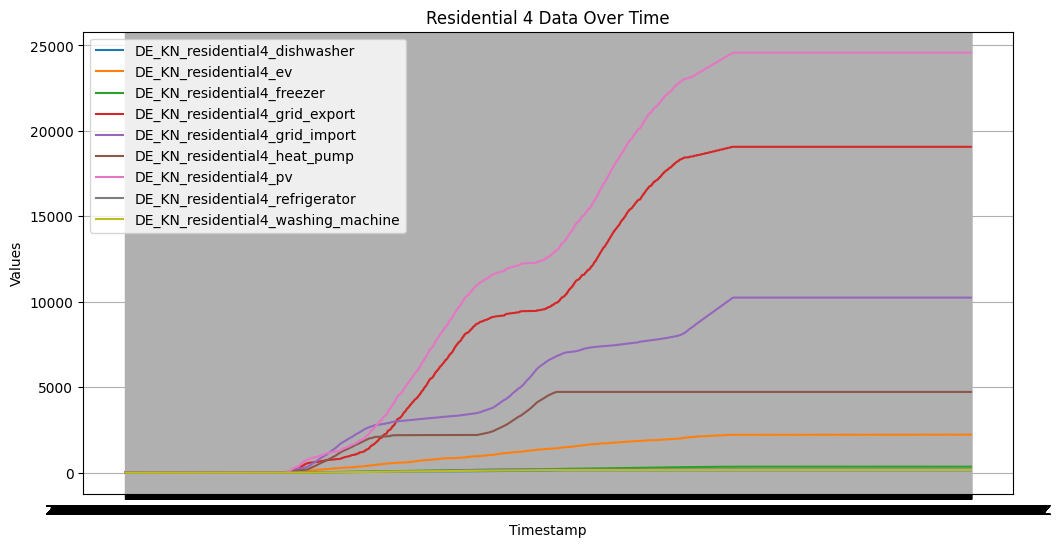

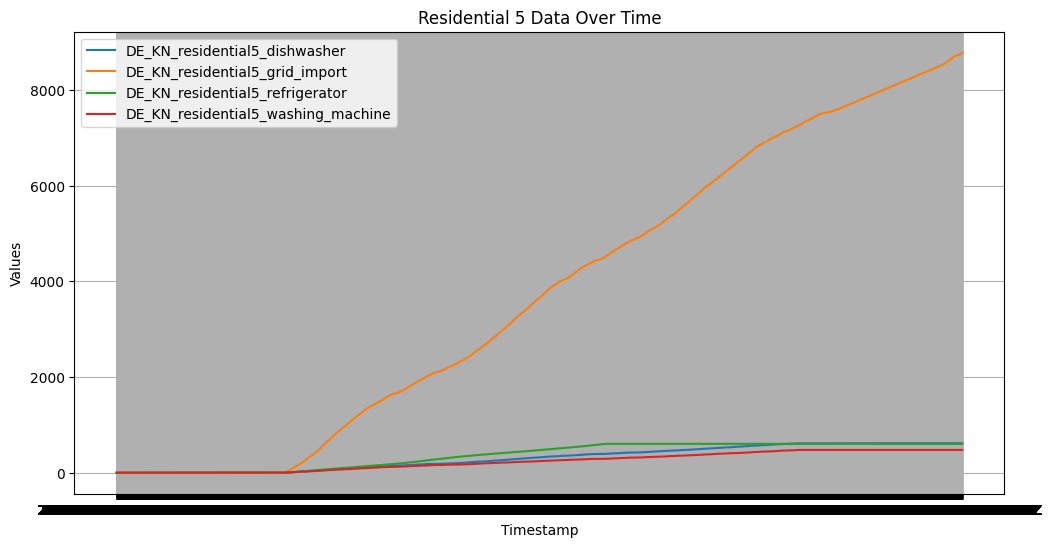

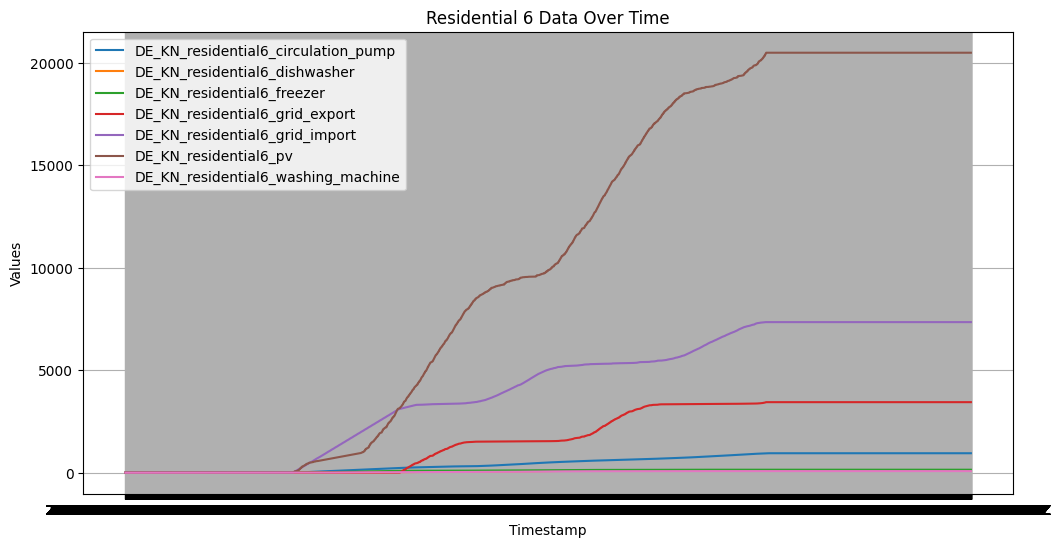

In [18]:
# Residential 1
plt.figure(figsize=(12, 6))
for col in residential1_df.columns[2:]:
    plt.plot(residential1_df['utc_timestamp'], residential1_df[col], label=col)
plt.title('Residential 1 Data Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Residential 2
plt.figure(figsize=(12, 6))
for col in residential2_df.columns[2:]:
    plt.plot(residential2_df['utc_timestamp'], residential2_df[col], label=col)
plt.title('Residential 2 Data Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Residential 3
plt.figure(figsize=(12, 6))
for col in residential3_df.columns[2:]:
    plt.plot(residential3_df['utc_timestamp'], residential3_df[col], label=col)
plt.title('Residential 3 Data Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Residential 4
plt.figure(figsize=(12, 6))
for col in residential4_df.columns[2:]:
    plt.plot(residential4_df['utc_timestamp'], residential4_df[col], label=col)
plt.title('Residential 4 Data Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Residential 5
plt.figure(figsize=(12, 6))
for col in residential5_df.columns[2:]:
    plt.plot(residential5_df['utc_timestamp'], residential5_df[col], label=col)
plt.title('Residential 5 Data Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Residential 6
plt.figure(figsize=(12, 6))
for col in residential6_df.columns[2:]:
    plt.plot(residential6_df['utc_timestamp'], residential6_df[col], label=col)
plt.title('Residential 6 Data Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


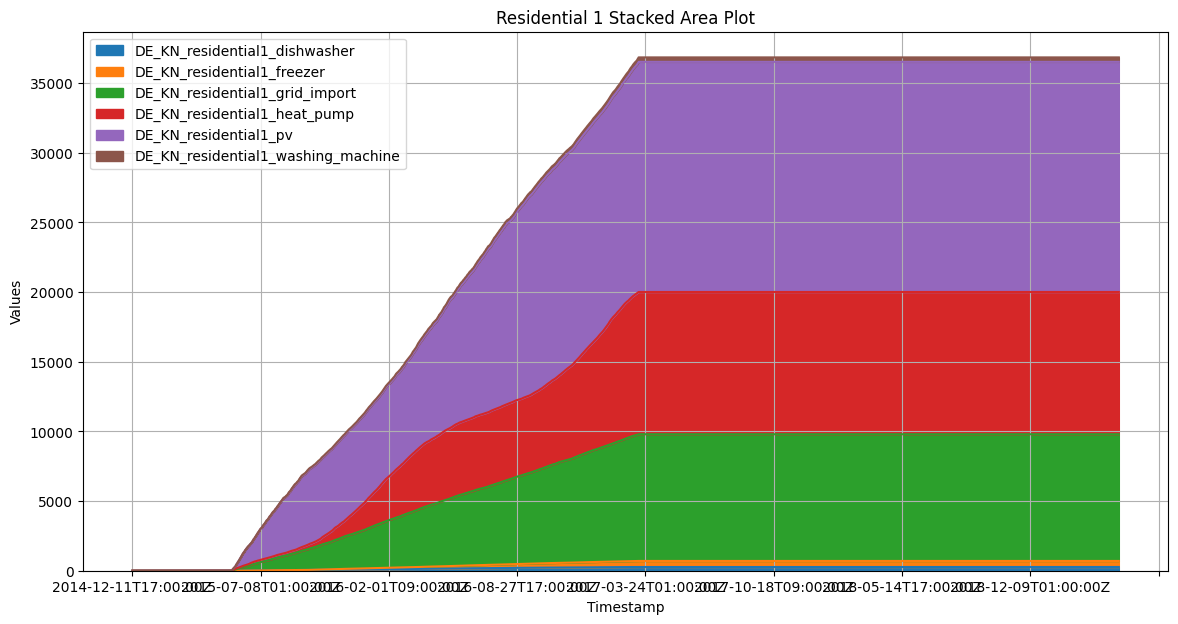

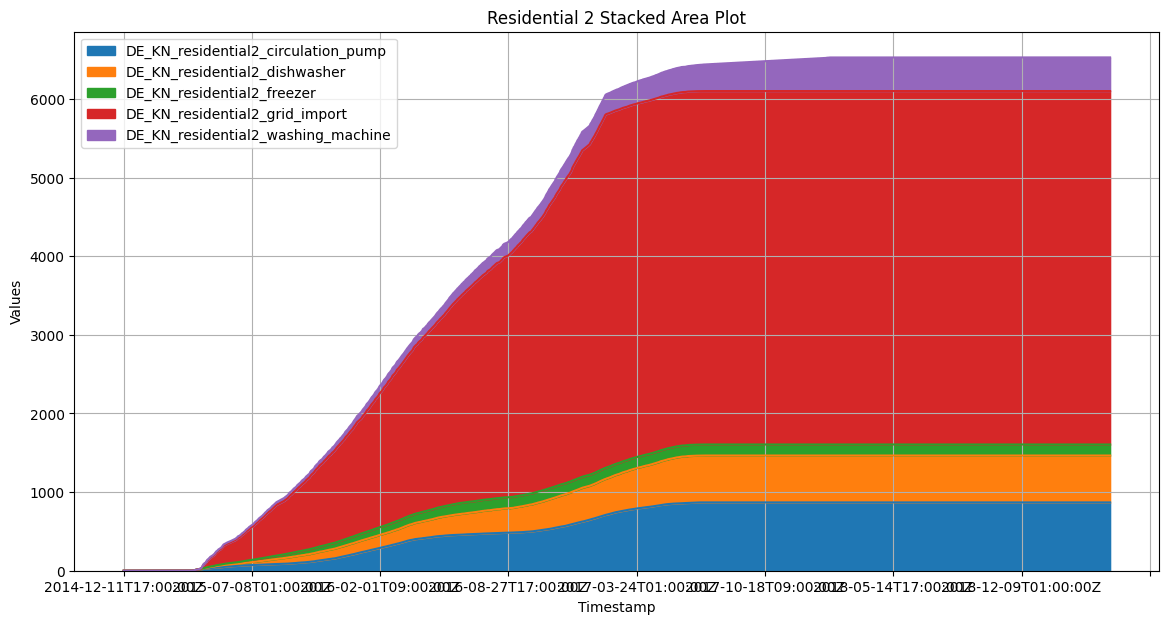

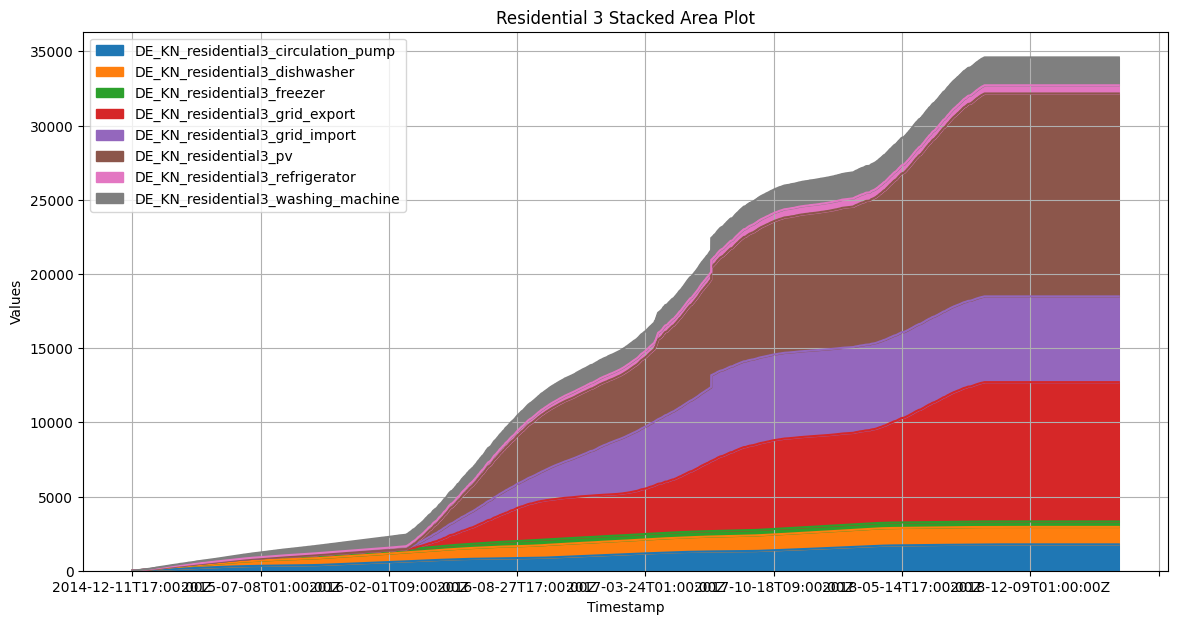

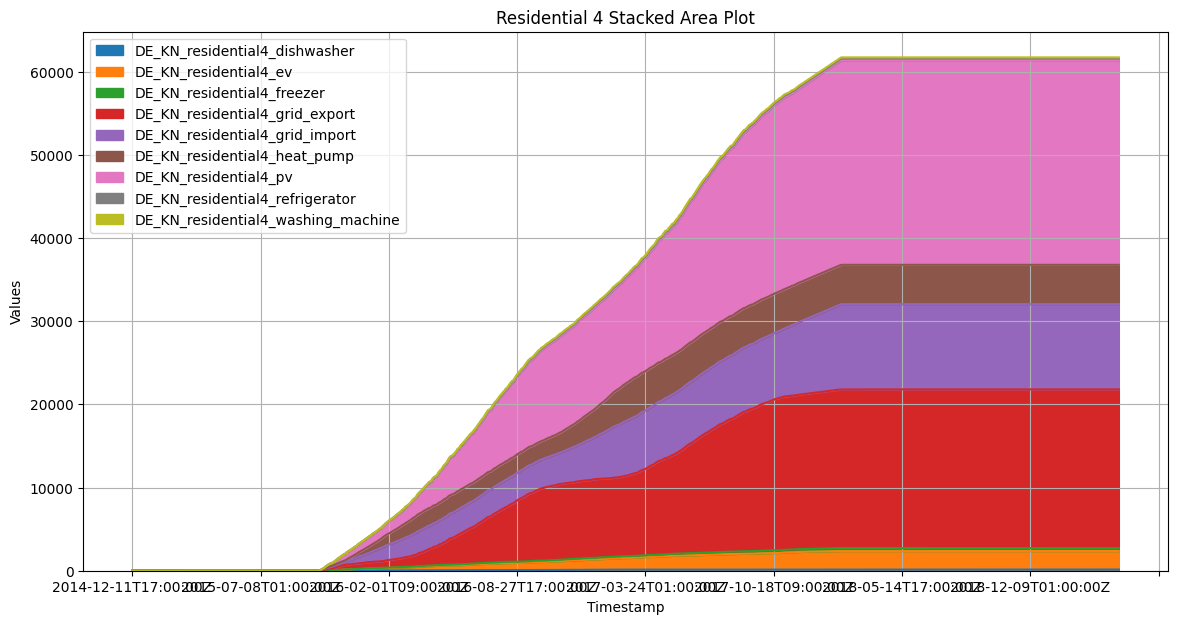

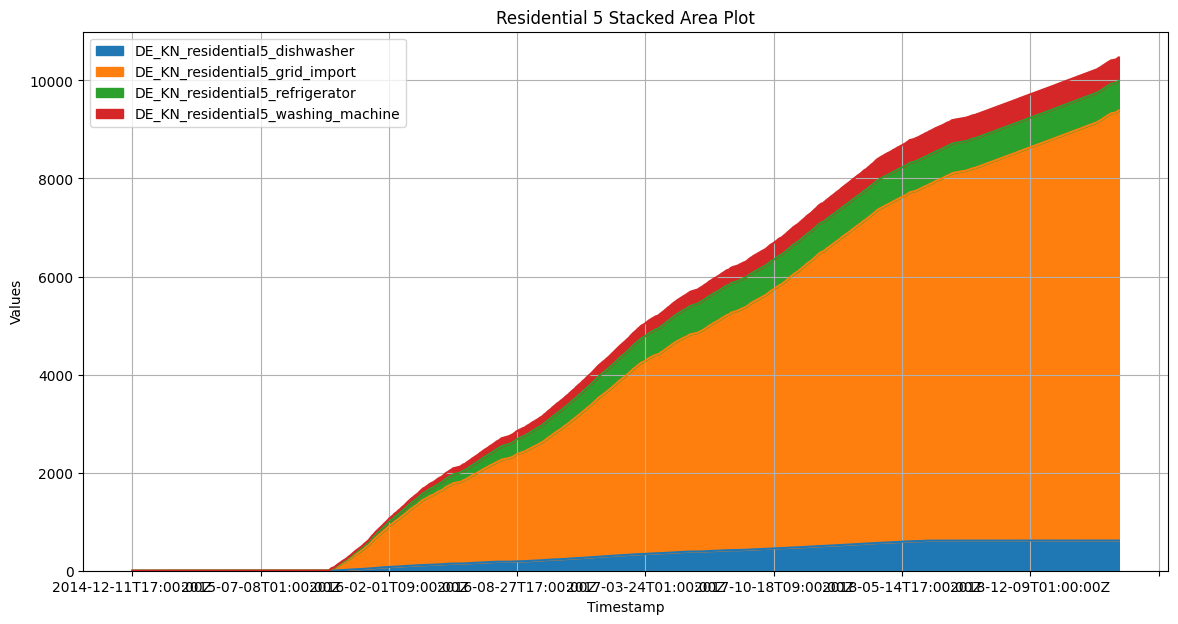

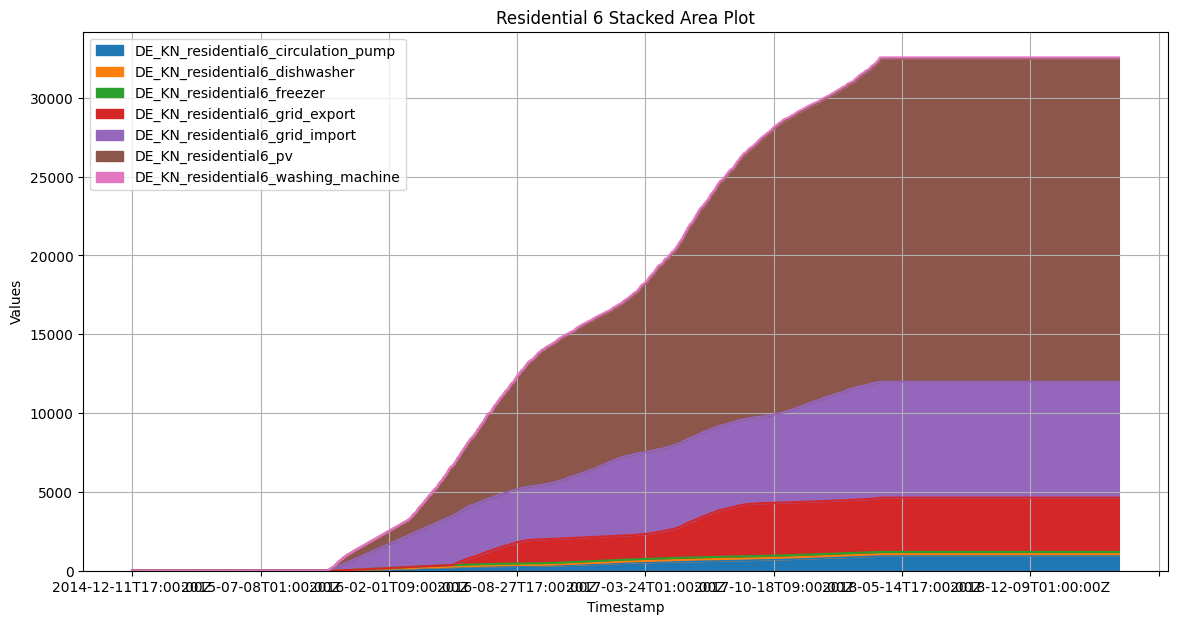

In [19]:

# Residential 1
residential1_df.set_index('utc_timestamp')[residential1_df.columns[2:]].plot.area(stacked=True, figsize=(14, 7))
plt.title('Residential 1 Stacked Area Plot')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.grid(True)
plt.show()

# Residential 2
residential2_df.set_index('utc_timestamp')[residential2_df.columns[2:]].plot.area(stacked=True, figsize=(14, 7))
plt.title('Residential 2 Stacked Area Plot')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.grid(True)
plt.show()

# Residential 3
residential3_df.set_index('utc_timestamp')[residential3_df.columns[2:]].plot.area(stacked=True, figsize=(14, 7))
plt.title('Residential 3 Stacked Area Plot')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.grid(True)
plt.show()

# Residential 4
residential4_df.set_index('utc_timestamp')[residential4_df.columns[2:]].plot.area(stacked=True, figsize=(14, 7))
plt.title('Residential 4 Stacked Area Plot')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.grid(True)
plt.show()

# Residential 5
residential5_df.set_index('utc_timestamp')[residential5_df.columns[2:]].plot.area(stacked=True, figsize=(14, 7))
plt.title('Residential 5 Stacked Area Plot')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.grid(True)
plt.show()

# Residential 6
residential6_df.set_index('utc_timestamp')[residential6_df.columns[2:]].plot.area(stacked=True, figsize=(14, 7))
plt.title('Residential 6 Stacked Area Plot')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.grid(True)
plt.show()


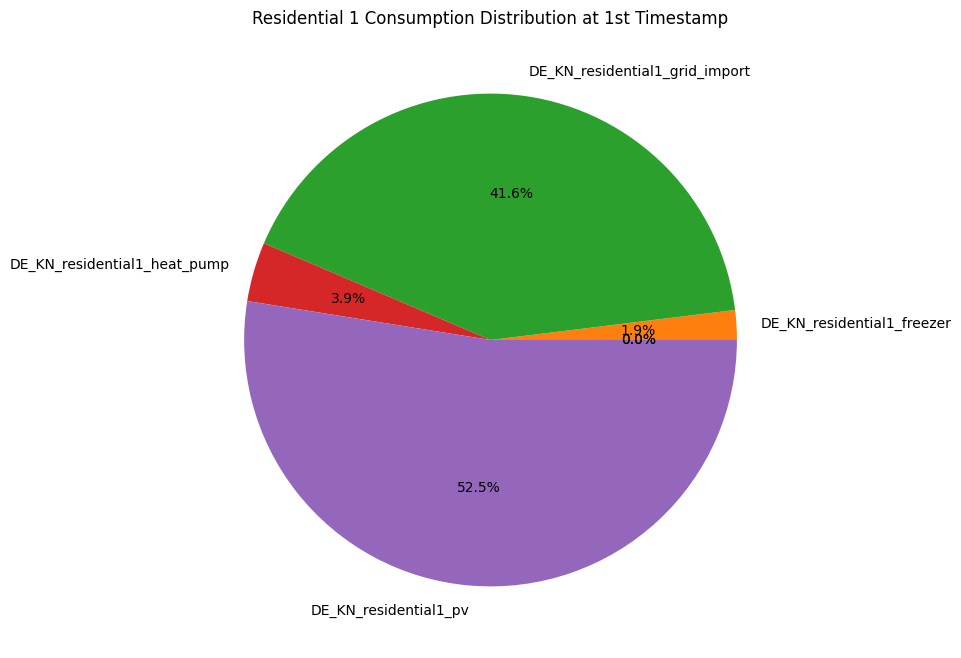

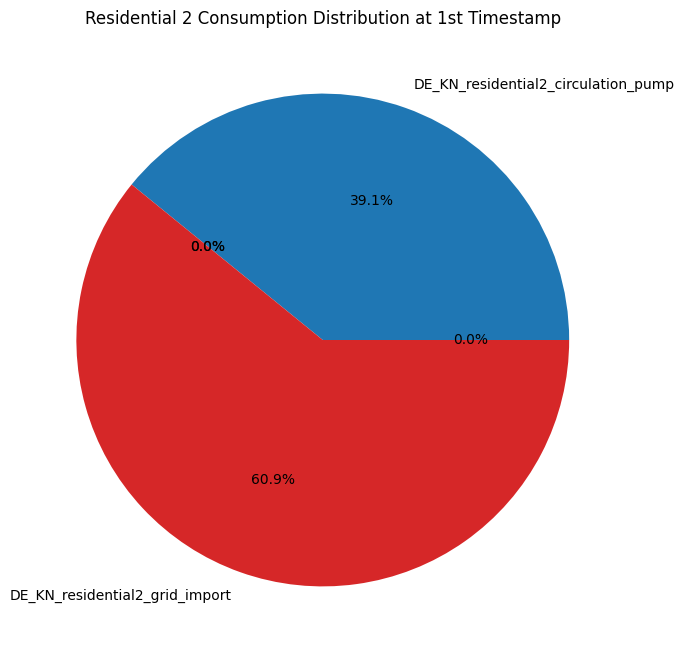

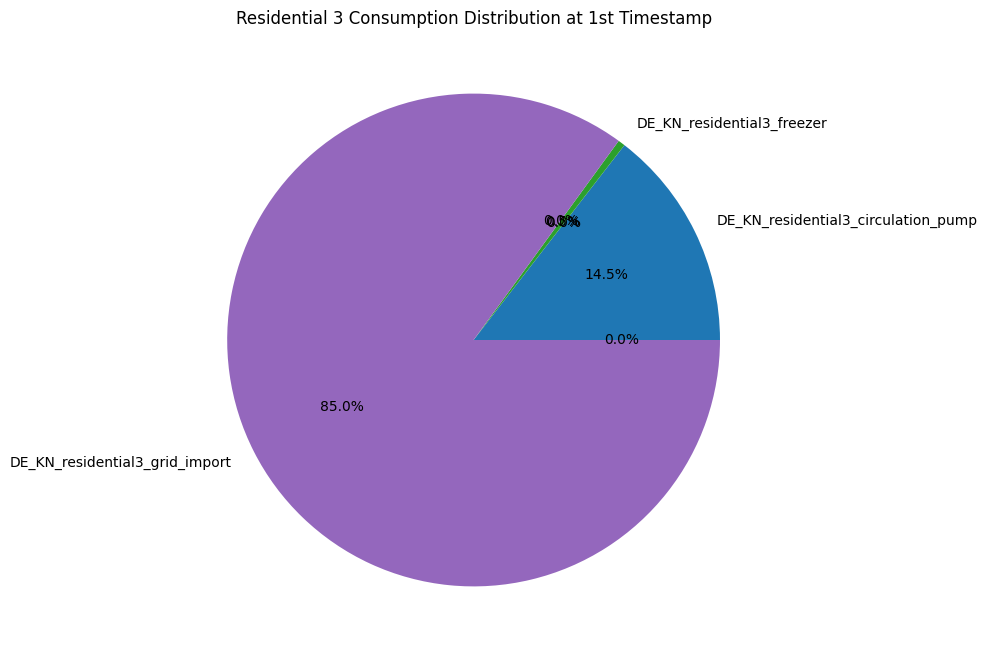

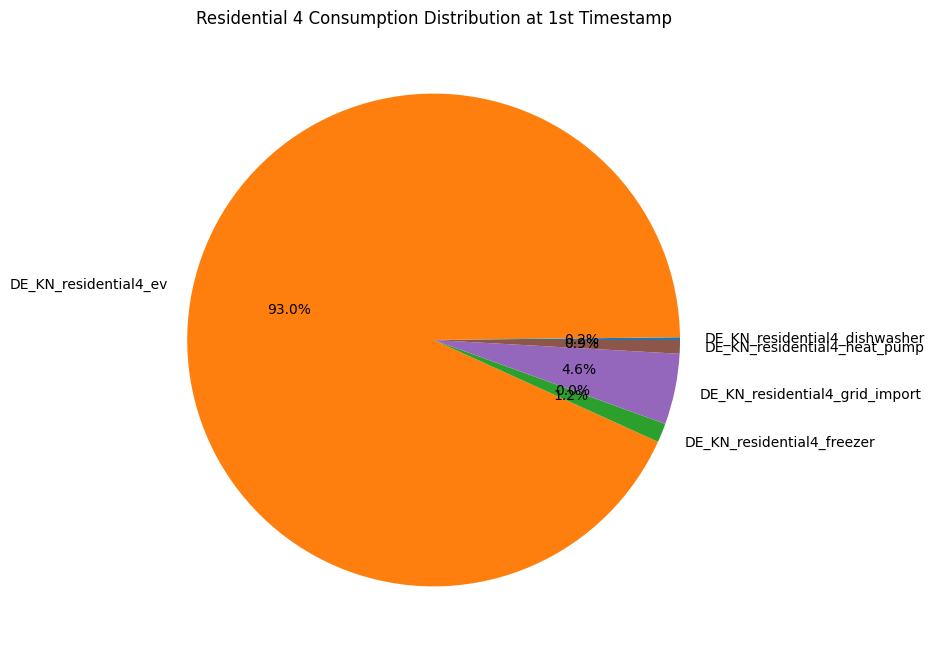

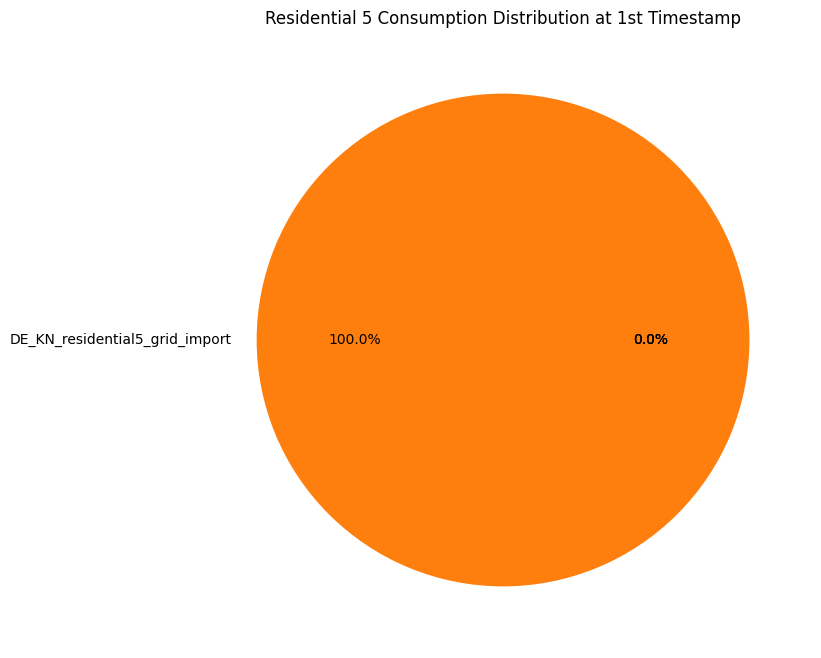

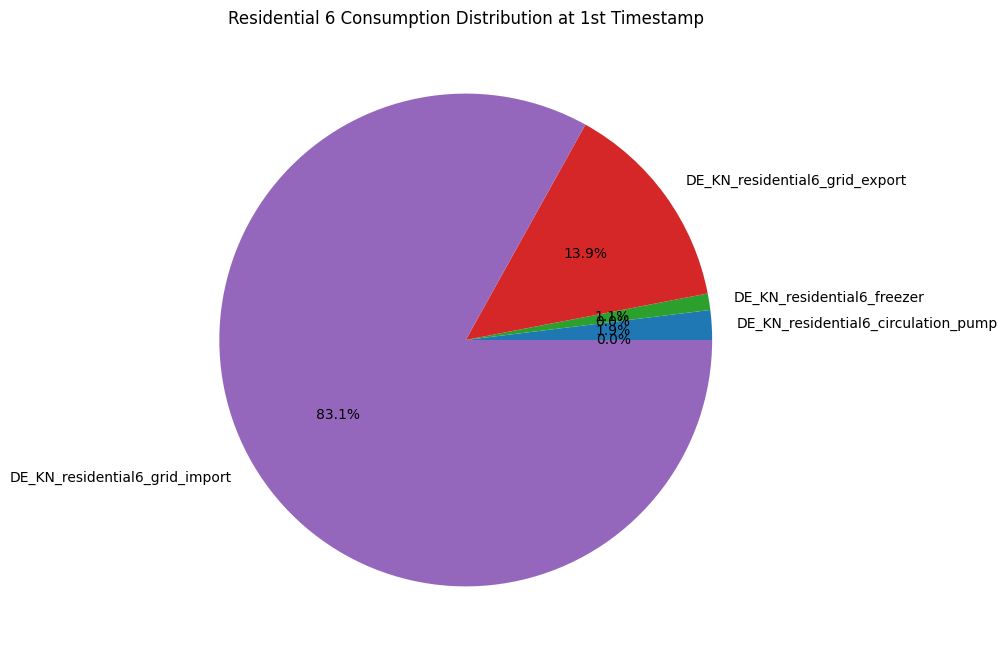

In [20]:


# Residential 1
residential1_df.iloc[0, 2:8].plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Residential 1 Consumption Distribution at 1st Timestamp')
plt.ylabel('')
plt.show()

# Residential 2
residential2_df.iloc[0, 2:8].plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Residential 2 Consumption Distribution at 1st Timestamp')
plt.ylabel('')
plt.show()

# Residential 3
residential3_df.iloc[0, 2:8].plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Residential 3 Consumption Distribution at 1st Timestamp')
plt.ylabel('')
plt.show()

# Residential 4
residential4_df.iloc[0, 2:8].plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Residential 4 Consumption Distribution at 1st Timestamp')
plt.ylabel('')
plt.show()

# Residential 5
residential5_df.iloc[0, 2:8].plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Residential 5 Consumption Distribution at 1st Timestamp')
plt.ylabel('')
plt.show()

# Residential 6
residential6_df.iloc[0, 2:8].plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Residential 6 Consumption Distribution at 1st Timestamp')
plt.ylabel('')
plt.show()


In [22]:
# List of all residential DataFrames
residential_dfs = [
    residential1_df, residential2_df, residential3_df,
    residential4_df, residential5_df, residential6_df
]

# List of column name prefixes for each DataFrame
residential_cols_list = [
    'DE_KN_residential1', 'DE_KN_residential2', 'DE_KN_residential3',
    'DE_KN_residential4', 'DE_KN_residential5', 'DE_KN_residential6'
]

# --------- Define a function to safely parse timestamps and add time parts ---------
def preprocess_datetime(df, timestamp_col='utc_timestamp'):
    # Ensure timestamp column exists
    if timestamp_col in df.columns:
        # Convert to datetime safely if not already
        if not pd.api.types.is_datetime64_any_dtype(df[timestamp_col]):
            df[timestamp_col] = pd.to_datetime(df[timestamp_col], errors='coerce')
        # Drop rows where utc_timestamp couldn't be converted
        df.dropna(subset=[timestamp_col], inplace=True)
        # Add time parts
        df['hour'] = df[timestamp_col].dt.hour
        df['day'] = df[timestamp_col].dt.date
        df['month'] = df[timestamp_col].dt.month
    else:
        raise ValueError(f"'{timestamp_col}' column not found in DataFrame")
    return df

# --------- Apply preprocessing to each DataFrame ---------
for df in residential_dfs:
    preprocess_datetime(df)

# --------- Generate residential columns list for each DataFrame ---------
residential_cols_lists = [
    [col for col in df.columns if col.startswith(prefix)]
    for df, prefix in zip(residential_dfs, residential_cols_list)
]

# --------- Grouped analysis: Hourly, Daily, Monthly ---------
results = {'hourly': [], 'daily': [], 'monthly': []}

for df, cols, label in zip(residential_dfs, residential_cols_lists, range(1,7)):
    # Hourly
    hourly = df.groupby('hour')[cols].mean()
    results['hourly'].append((f"Residential {label}", hourly))

    # Daily
    daily = df.groupby('day')[cols].mean()
    results['daily'].append((f"Residential {label}", daily))

    # Monthly
    monthly = df.groupby('month')[cols].mean()
    results['monthly'].append((f"Residential {label}", monthly))

# --------- Display Results Cleanly ---------
for period in ['hourly', 'daily', 'monthly']:
    print(f"\n===== {period.capitalize()} Analysis =====")
    for label, result_df in results[period]:
        print(f"\n{label}")
        display(result_df.head())

C:\Users\oppor\AppData\Local\Temp\ipykernel_5512\1679372798.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[timestamp_col] = pd.to_datetime(df[timestamp_col], errors='coerce')
C:\Users\oppor\AppData\Local\Temp\ipykernel_5512\1679372798.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=[timestamp_col], inplace=True)
C:\Users\oppor\AppData\Local\Temp\ipykernel_5512\1679372798.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 


===== Hourly Analysis =====

Residential 1


,DE_KN_residential1_dishwasher,DE_KN_residential1_freezer,DE_KN_residential1_grid_import,DE_KN_residential1_heat_pump,DE_KN_residential1_pv,DE_KN_residential1_washing_machine
hour,,,,,,
0,190.033078,282.964664,6262.319314,6632.223533,11891.788021,220.058097
1,190.033105,282.975896,6262.470165,6632.383732,11891.788021,220.058224
2,190.033122,282.987062,6262.622602,6632.567353,11891.788021,220.058348
3,190.033137,282.998436,6262.783814,6632.902612,11891.788478,220.058468
4,190.033194,283.009647,6262.973125,6633.581880,11891.809726,220.058593



Residential 2


,DE_KN_residential2_circulation_pump,DE_KN_residential2_dishwasher,DE_KN_residential2_freezer,DE_KN_residential2_grid_import,DE_KN_residential2_washing_machine
hour,,,,,
0,571.390667,383.253350,111.422611,3126.912644,244.544616
1,571.400619,383.253557,111.426187,3126.965498,244.544675
2,571.413778,383.253758,111.429748,3127.020474,244.544734
3,571.449519,383.253954,111.433504,3127.094373,244.544786
4,571.495177,383.254358,111.437197,3127.190298,244.545234



Residential 3


,DE_KN_residential3_circulation_pump,DE_KN_residential3_dishwasher,DE_KN_residential3_freezer,DE_KN_residential3_grid_export,DE_KN_residential3_grid_import,DE_KN_residential3_pv,DE_KN_residential3_refrigerator,DE_KN_residential3_washing_machine
hour,,,,,,,,
0,1062.596372,825.675090,292.907205,3846.438377,3164.461790,5742.733288,358.834745,1179.563732
1,1062.633635,825.678528,292.916184,3846.438377,3164.560303,5742.962081,358.847358,1179.575672
2,1062.676590,825.681665,292.926080,3846.438377,3164.643641,5742.962081,358.860762,1179.581238
3,1062.717929,825.685556,292.935061,3846.438377,3164.716803,5742.963252,358.872886,1179.583940
4,1062.761611,825.688501,292.944483,3846.444522,3164.804064,5742.989331,358.886141,1179.594061



Residential 4


,DE_KN_residential4_dishwasher,DE_KN_residential4_ev,DE_KN_residential4_freezer,DE_KN_residential4_grid_export,DE_KN_residential4_grid_import,DE_KN_residential4_heat_pump,DE_KN_residential4_pv,DE_KN_residential4_refrigerator,DE_KN_residential4_washing_machine
hour,,,,,,,,,
0,91.513743,1240.907292,196.525006,10203.736647,5534.267948,2989.230674,13130.185748,128.320793,102.418191
1,91.513748,1240.911423,196.533961,10203.736647,5534.536404,2989.344312,13130.185748,128.325250,102.418194
2,91.513750,1240.912964,196.543246,10203.736647,5534.800276,2989.459514,13130.185748,128.330037,102.418194
3,91.513750,1240.913675,196.551890,10203.736712,5535.065795,2989.574517,13130.186875,128.334216,102.418194
4,91.513751,1240.913679,196.561069,10203.743793,5535.332146,2989.688388,13130.211365,128.338856,102.418194



Residential 5


,DE_KN_residential5_dishwasher,DE_KN_residential5_grid_import,DE_KN_residential5_refrigerator,DE_KN_residential5_washing_machine
hour,,,,
0,309.804800,3755.581875,366.428404,239.537946
1,309.807675,3755.725423,366.443634,239.537999
2,309.809958,3755.858875,366.457639,239.538064
3,309.810059,3755.978482,366.472378,239.538308
4,309.810663,3756.117871,366.486658,239.543505



Residential 6


,DE_KN_residential6_circulation_pump,DE_KN_residential6_dishwasher,DE_KN_residential6_freezer,DE_KN_residential6_grid_export,DE_KN_residential6_grid_import,DE_KN_residential6_pv,DE_KN_residential6_washing_machine
hour,,,,,,,
0,486.272016,58.697350,95.968475,1778.942575,4135.864057,10582.814924,47.537785
1,486.292717,58.697417,95.971737,1778.943554,4136.005096,10582.814924,47.537797
2,486.313388,58.697489,95.974999,1778.944454,4136.137366,10582.814924,47.537810
3,486.334313,58.698998,95.978177,1778.945671,4136.266207,10582.814969,47.537822
4,486.355756,58.703360,95.981303,1778.949471,4136.405852,10582.823129,47.537832



===== Daily Analysis =====

Residential 1


,DE_KN_residential1_dishwasher,DE_KN_residential1_freezer,DE_KN_residential1_grid_import,DE_KN_residential1_heat_pump,DE_KN_residential1_pv,DE_KN_residential1_washing_machine
day,,,,,,
2014-12-11,0.0,0.005,0.107,0.01,0.135,0.0
2014-12-12,0.0,0.005,0.107,0.01,0.135,0.0
2014-12-13,0.0,0.005,0.107,0.01,0.135,0.0
2014-12-14,0.0,0.005,0.107,0.01,0.135,0.0
2014-12-15,0.0,0.005,0.107,0.01,0.135,0.0



Residential 2


,DE_KN_residential2_circulation_pump,DE_KN_residential2_dishwasher,DE_KN_residential2_freezer,DE_KN_residential2_grid_import,DE_KN_residential2_washing_machine
day,,,,,
2014-12-11,0.045,0.0,0.0,0.07,0.0
2014-12-12,0.045,0.0,0.0,0.07,0.0
2014-12-13,0.045,0.0,0.0,0.07,0.0
2014-12-14,0.045,0.0,0.0,0.07,0.0
2014-12-15,0.045,0.0,0.0,0.07,0.0



Residential 3


,DE_KN_residential3_circulation_pump,DE_KN_residential3_dishwasher,DE_KN_residential3_freezer,DE_KN_residential3_grid_export,DE_KN_residential3_grid_import,DE_KN_residential3_pv,DE_KN_residential3_refrigerator,DE_KN_residential3_washing_machine
day,,,,,,,,
2014-12-11,0.200857,0.007857,0.089857,0.0,0.369,0.0,0.0,0.000000
2014-12-12,1.352875,1.239792,0.532000,0.0,0.369,0.0,0.0,0.000875
2014-12-13,3.170500,2.564083,1.213375,0.0,0.369,0.0,0.0,0.001833
2014-12-14,4.944917,4.174167,1.898333,0.0,0.369,0.0,0.0,1.495750
2014-12-15,6.577542,5.500125,2.584792,0.0,0.369,0.0,0.0,3.212875



Residential 4


,DE_KN_residential4_dishwasher,DE_KN_residential4_ev,DE_KN_residential4_freezer,DE_KN_residential4_grid_export,DE_KN_residential4_grid_import,DE_KN_residential4_heat_pump,DE_KN_residential4_pv,DE_KN_residential4_refrigerator,DE_KN_residential4_washing_machine
day,,,,,,,,,
2014-12-11,0.002,1.043,0.014,0.0,0.052,0.01,0.0,0.0,0.001
2014-12-12,0.002,1.043,0.014,0.0,0.052,0.01,0.0,0.0,0.001
2014-12-13,0.002,1.043,0.014,0.0,0.052,0.01,0.0,0.0,0.001
2014-12-14,0.002,1.043,0.014,0.0,0.052,0.01,0.0,0.0,0.001
2014-12-15,0.002,1.043,0.014,0.0,0.052,0.01,0.0,0.0,0.001



Residential 5


,DE_KN_residential5_dishwasher,DE_KN_residential5_grid_import,DE_KN_residential5_refrigerator,DE_KN_residential5_washing_machine
day,,,,
2014-12-11,0.0,0.045,0.0,0.0
2014-12-12,0.0,0.045,0.0,0.0
2014-12-13,0.0,0.045,0.0,0.0
2014-12-14,0.0,0.045,0.0,0.0
2014-12-15,0.0,0.045,0.0,0.0



Residential 6


,DE_KN_residential6_circulation_pump,DE_KN_residential6_dishwasher,DE_KN_residential6_freezer,DE_KN_residential6_grid_export,DE_KN_residential6_grid_import,DE_KN_residential6_pv,DE_KN_residential6_washing_machine
day,,,,,,,
2014-12-11,0.056,0.0,0.031,0.4,2.39,0.0,0.0
2014-12-12,0.056,0.0,0.031,0.4,2.39,0.0,0.0
2014-12-13,0.056,0.0,0.031,0.4,2.39,0.0,0.0
2014-12-14,0.056,0.0,0.031,0.4,2.39,0.0,0.0
2014-12-15,0.056,0.0,0.031,0.4,2.39,0.0,0.0



===== Monthly Analysis =====

Residential 1


,DE_KN_residential1_dishwasher,DE_KN_residential1_freezer,DE_KN_residential1_grid_import,DE_KN_residential1_heat_pump,DE_KN_residential1_pv,DE_KN_residential1_washing_machine
month,,,,,,
1,179.239963,269.479827,5929.000021,6309.070137,11065.648399,207.135870
2,182.710287,277.177873,6090.787459,6675.735058,11130.844737,212.791329
3,187.141325,286.333759,6267.959948,6972.210492,11363.864206,220.218366
4,190.310260,291.426981,6361.548853,7079.072041,11556.530421,223.821757
5,174.954055,263.603194,5814.039714,6417.979009,10657.184356,204.645613



Residential 2


,DE_KN_residential2_circulation_pump,DE_KN_residential2_dishwasher,DE_KN_residential2_freezer,DE_KN_residential2_grid_import,DE_KN_residential2_washing_machine
month,,,,,
1,534.452027,358.145498,103.113034,2977.854546,234.918421
2,556.759001,365.960320,104.975012,3051.969949,241.323914
3,579.567544,378.466871,106.840187,3105.302853,246.817587
4,598.456963,390.386038,109.173728,3152.538976,251.561628
5,554.288783,359.949399,106.290761,2919.659949,220.228295



Residential 3


,DE_KN_residential3_circulation_pump,DE_KN_residential3_dishwasher,DE_KN_residential3_freezer,DE_KN_residential3_grid_export,DE_KN_residential3_grid_import,DE_KN_residential3_pv,DE_KN_residential3_refrigerator,DE_KN_residential3_washing_machine
month,,,,,,,,
1,995.996178,763.372161,267.468235,3662.854009,2979.951393,5447.542270,336.642472,1110.429610
2,1035.048805,787.141636,271.239095,3652.646433,3039.380481,5447.129886,344.204335,1142.442800
3,1081.041646,811.998454,276.598351,3751.307851,3169.888877,5613.515835,354.123997,1179.834577
4,1124.062774,835.477956,285.028706,3927.495356,3294.311330,5927.532632,363.606121,1210.911737
5,1009.825070,781.084680,276.591680,2927.112786,2831.501656,4530.865004,329.976433,1085.903054



Residential 4


,DE_KN_residential4_dishwasher,DE_KN_residential4_ev,DE_KN_residential4_freezer,DE_KN_residential4_grid_export,DE_KN_residential4_grid_import,DE_KN_residential4_heat_pump,DE_KN_residential4_pv,DE_KN_residential4_refrigerator,DE_KN_residential4_washing_machine
month,,,,,,,,,
1,86.851733,1195.215333,189.630481,9653.612624,5436.337072,2855.374530,12468.932162,123.318928,96.155226
2,89.985578,1225.948348,193.903920,9697.866972,5787.505285,3072.211138,12591.476933,124.968461,100.250716
3,93.963656,1265.213510,199.240624,9959.093861,6009.180299,3228.689255,12958.595960,127.751574,104.286512
4,96.548227,1306.272625,204.051218,10324.861189,6102.032513,3262.349420,13421.114175,130.015482,106.645452
5,87.800989,1129.862593,174.148320,8735.878551,5193.075939,2928.285391,11376.846788,117.536507,96.930221



Residential 5


,DE_KN_residential5_dishwasher,DE_KN_residential5_grid_import,DE_KN_residential5_refrigerator,DE_KN_residential5_washing_machine
month,,,,
1,296.872570,3658.223709,344.541444,229.434276
2,308.603356,3831.192282,353.279743,237.366980
3,323.270432,4040.316948,365.894280,247.820940
4,334.707486,4213.743755,377.179053,257.950759
5,281.436508,3287.885965,337.151588,216.281666



Residential 6


,DE_KN_residential6_circulation_pump,DE_KN_residential6_dishwasher,DE_KN_residential6_freezer,DE_KN_residential6_grid_export,DE_KN_residential6_grid_import,DE_KN_residential6_pv,DE_KN_residential6_washing_machine
month,,,,,,,
1,465.421763,55.489016,89.106976,1667.627925,3967.682053,9966.713834,44.173326
2,486.696781,57.094997,92.956328,1657.507189,4189.595155,10038.147527,46.416447
3,512.727123,59.276603,97.381303,1677.264860,4392.820468,10426.892996,48.785430
4,532.364788,60.796536,101.720139,1715.719044,4524.050263,10940.997722,50.330081
5,446.963885,54.666563,94.385837,1386.915570,3965.026754,9175.097245,44.908113


C:\Users\oppor\AppData\Local\Temp\ipykernel_5512\3004675777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential1_df.loc[:, 'total_usage'] = residential1_df[[col for col in residential1_df.columns if col.startswith('DE_KN_residential1_')]].sum(axis=1)
C:\Users\oppor\AppData\Local\Temp\ipykernel_5512\3004675777.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential2_df.loc[:, 'total_usage'] = residential2_df[[col for col in residential2_df.columns if col.startswith('DE_KN_residential2_')]

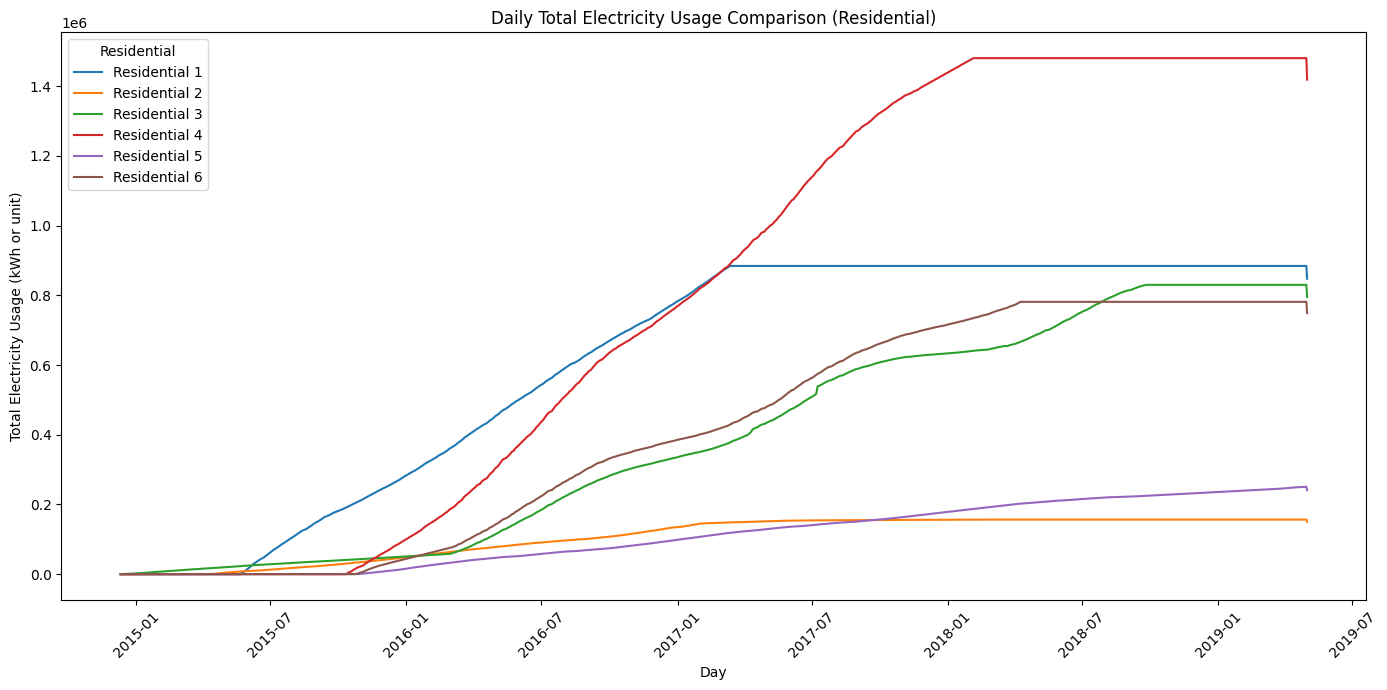

In [24]:

# Step 1: Calculating total_usage for each residential dataset
residential1_df.loc[:, 'total_usage'] = residential1_df[[col for col in residential1_df.columns if col.startswith('DE_KN_residential1_')]].sum(axis=1)
residential2_df.loc[:, 'total_usage'] = residential2_df[[col for col in residential2_df.columns if col.startswith('DE_KN_residential2_')]].sum(axis=1)
residential3_df.loc[:, 'total_usage'] = residential3_df[[col for col in residential3_df.columns if col.startswith('DE_KN_residential3_')]].sum(axis=1)
residential4_df.loc[:, 'total_usage'] = residential4_df[[col for col in residential4_df.columns if col.startswith('DE_KN_residential4_')]].sum(axis=1)
residential5_df.loc[:, 'total_usage'] = residential5_df[[col for col in residential5_df.columns if col.startswith('DE_KN_residential5_')]].sum(axis=1)
residential6_df.loc[:, 'total_usage'] = residential6_df[[col for col in residential6_df.columns if col.startswith('DE_KN_residential6_')]].sum(axis=1)

# Step 2: Groupping by 'day' and assign industry labels
res1_daily = residential1_df.groupby('day')['total_usage'].sum().reset_index().assign(industry='Residential 1')
res2_daily = residential2_df.groupby('day')['total_usage'].sum().reset_index().assign(industry='Residential 2')
res3_daily = residential3_df.groupby('day')['total_usage'].sum().reset_index().assign(industry='Residential 3')
res4_daily = residential4_df.groupby('day')['total_usage'].sum().reset_index().assign(industry='Residential 4')
res5_daily = residential5_df.groupby('day')['total_usage'].sum().reset_index().assign(industry='Residential 5')
res6_daily = residential6_df.groupby('day')['total_usage'].sum().reset_index().assign(industry='Residential 6')

# Step 3: Combining all into a single DataFrame
residential_daily_usage = pd.concat([res1_daily, res2_daily, res3_daily, res4_daily, res5_daily, res6_daily])

# Step 4: Plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=residential_daily_usage, x='day', y='total_usage', hue='industry')
plt.title('Daily Total Electricity Usage Comparison (Residential)')
plt.xlabel('Day')
plt.ylabel('Total Electricity Usage (kWh or unit)')
plt.xticks(rotation=45)
plt.legend(title='Residential')
plt.tight_layout()
plt.show()


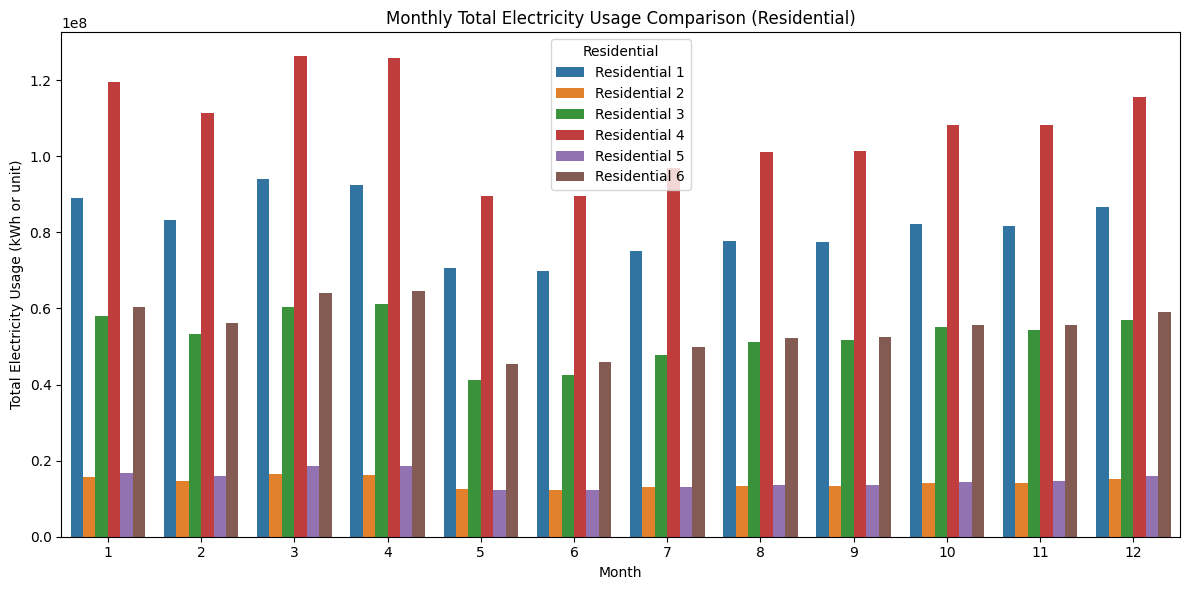

In [26]:
# Step 1: Group each residential DataFrame by 'month' and sum total_usage
res1_monthly = residential1_df.groupby('month')['total_usage'].sum().reset_index().assign(industry='Residential 1')
res2_monthly = residential2_df.groupby('month')['total_usage'].sum().reset_index().assign(industry='Residential 2')
res3_monthly = residential3_df.groupby('month')['total_usage'].sum().reset_index().assign(industry='Residential 3')
res4_monthly = residential4_df.groupby('month')['total_usage'].sum().reset_index().assign(industry='Residential 4')
res5_monthly = residential5_df.groupby('month')['total_usage'].sum().reset_index().assign(industry='Residential 5')
res6_monthly = residential6_df.groupby('month')['total_usage'].sum().reset_index().assign(industry='Residential 6')

# Step 2: Combining all into one DataFrame
residential_monthly_usage = pd.concat([res1_monthly, res2_monthly, res3_monthly, res4_monthly, res5_monthly, res6_monthly])

# Step 3: Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=residential_monthly_usage, x='month', y='total_usage', hue='industry')
plt.title('Monthly Total Electricity Usage Comparison (Residential)')
plt.xlabel('Month')
plt.ylabel('Total Electricity Usage (kWh or unit)')
plt.legend(title='Residential')
plt.tight_layout()
plt.show()


C:\Users\oppor\AppData\Local\Temp\ipykernel_5512\624736422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential1_df.loc[:, 'year'] = residential1_df['utc_timestamp'].dt.year
C:\Users\oppor\AppData\Local\Temp\ipykernel_5512\624736422.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential2_df.loc[:, 'year'] = residential2_df['utc_timestamp'].dt.year
C:\Users\oppor\AppData\Local\Temp\ipykernel_5512\624736422.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

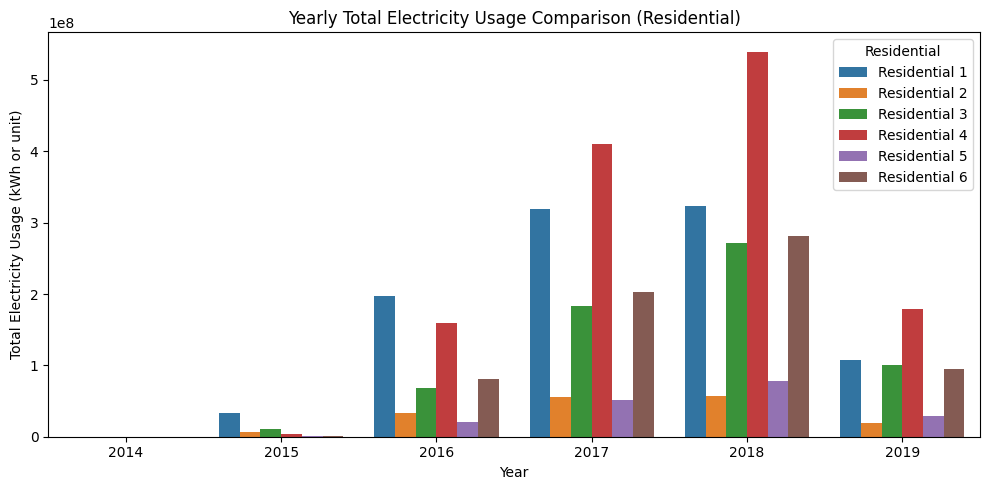

In [28]:
# Step 1: Extracting 'year' from timestamps
residential1_df.loc[:, 'year'] = residential1_df['utc_timestamp'].dt.year
residential2_df.loc[:, 'year'] = residential2_df['utc_timestamp'].dt.year
residential3_df.loc[:, 'year'] = residential3_df['utc_timestamp'].dt.year
residential4_df.loc[:, 'year'] = residential4_df['utc_timestamp'].dt.year
residential5_df.loc[:, 'year'] = residential5_df['utc_timestamp'].dt.year
residential6_df.loc[:, 'year'] = residential6_df['utc_timestamp'].dt.year

# Step 2: Groupping by year and sum total_usage
res1_yearly = residential1_df.groupby('year')['total_usage'].sum().reset_index().assign(industry='Residential 1')
res2_yearly = residential2_df.groupby('year')['total_usage'].sum().reset_index().assign(industry='Residential 2')
res3_yearly = residential3_df.groupby('year')['total_usage'].sum().reset_index().assign(industry='Residential 3')
res4_yearly = residential4_df.groupby('year')['total_usage'].sum().reset_index().assign(industry='Residential 4')
res5_yearly = residential5_df.groupby('year')['total_usage'].sum().reset_index().assign(industry='Residential 5')
res6_yearly = residential6_df.groupby('year')['total_usage'].sum().reset_index().assign(industry='Residential 6')

# Step 3: Combining all into one DataFrame
residential_yearly_usage = pd.concat([res1_yearly, res2_yearly, res3_yearly, res4_yearly, res5_yearly, res6_yearly])

# Step 4: Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=residential_yearly_usage, x='year', y='total_usage', hue='industry')
plt.title('Yearly Total Electricity Usage Comparison (Residential)')
plt.xlabel('Year')
plt.ylabel('Total Electricity Usage (kWh or unit)')
plt.legend(title='Residential')
plt.tight_layout()
plt.show()
